# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The problem of identifying the key drivers for used car prices can be summarized as a regression problem where we need to identify the most import features to build a regression model that will predict the prices of the car. These features that will correlate the most with the prices prediction will be the key drivers for used car prices.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import concurrent.futures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [8]:
data = pd.read_csv('data/vehicles.csv')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [10]:
print("Number of vehicles: " + str(len(data)))
print("Number of vehicles with missing data: " + str(len(data) - len(data.dropna())))

Number of vehicles: 426880
Number of vehicles with missing data: 392012


In [11]:
# In this cell we show the number of data missing in each column of the dataframe
data.isnull().sum()[data.isnull().sum() > 0]

year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
dtype: int64

In [12]:
len(data.dropna())

34868

In [13]:
data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [14]:
data.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


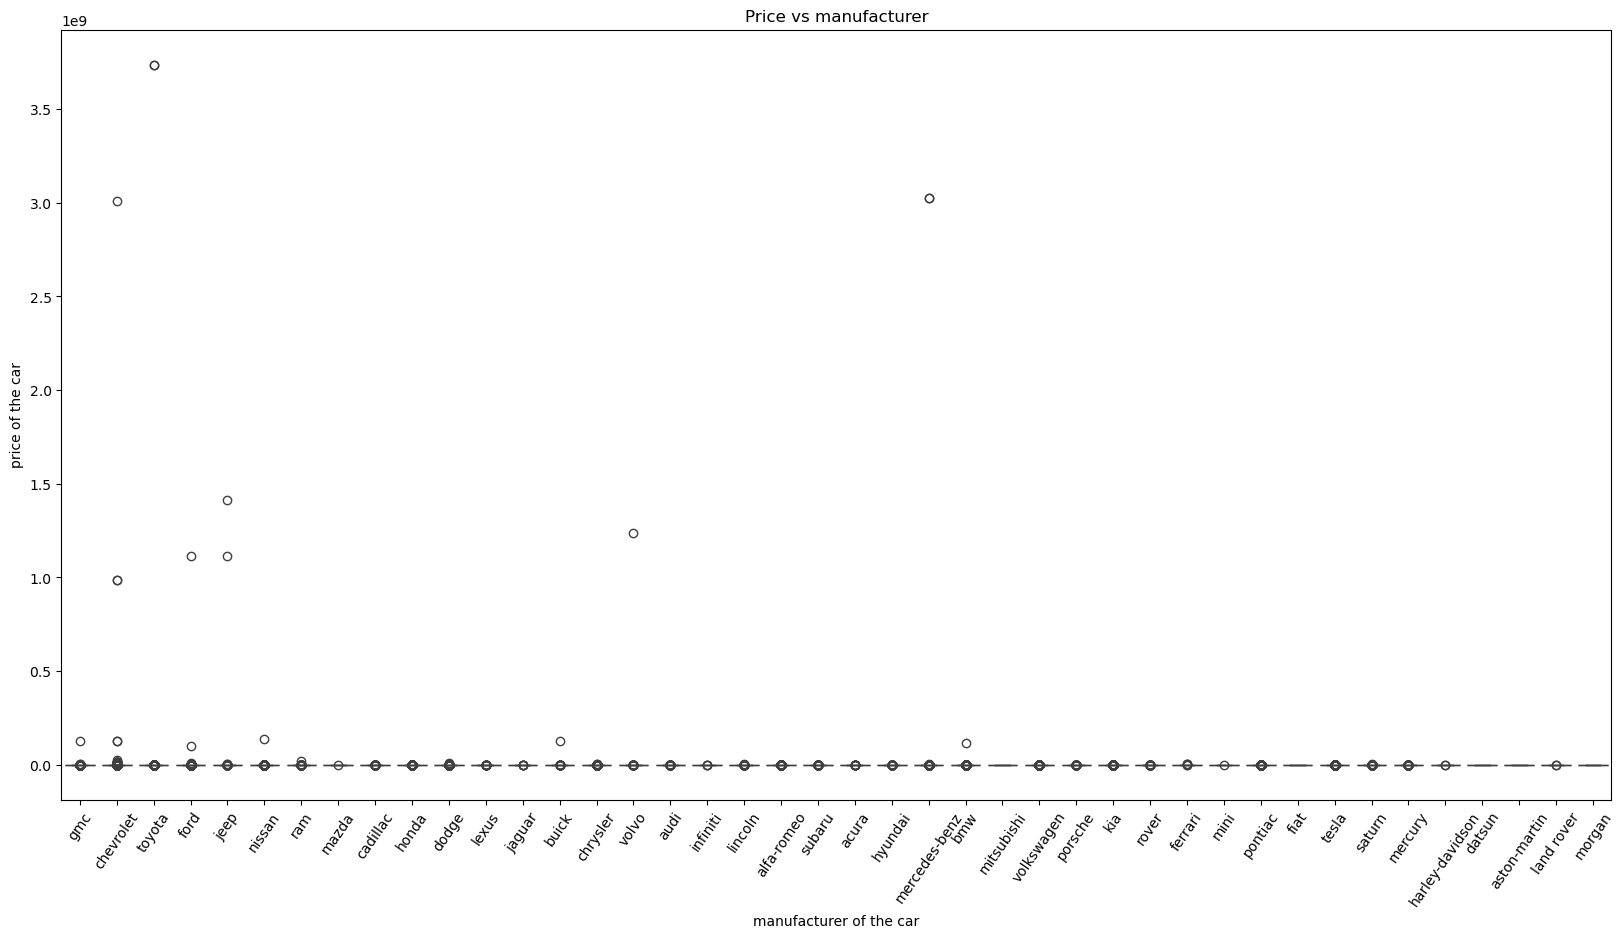

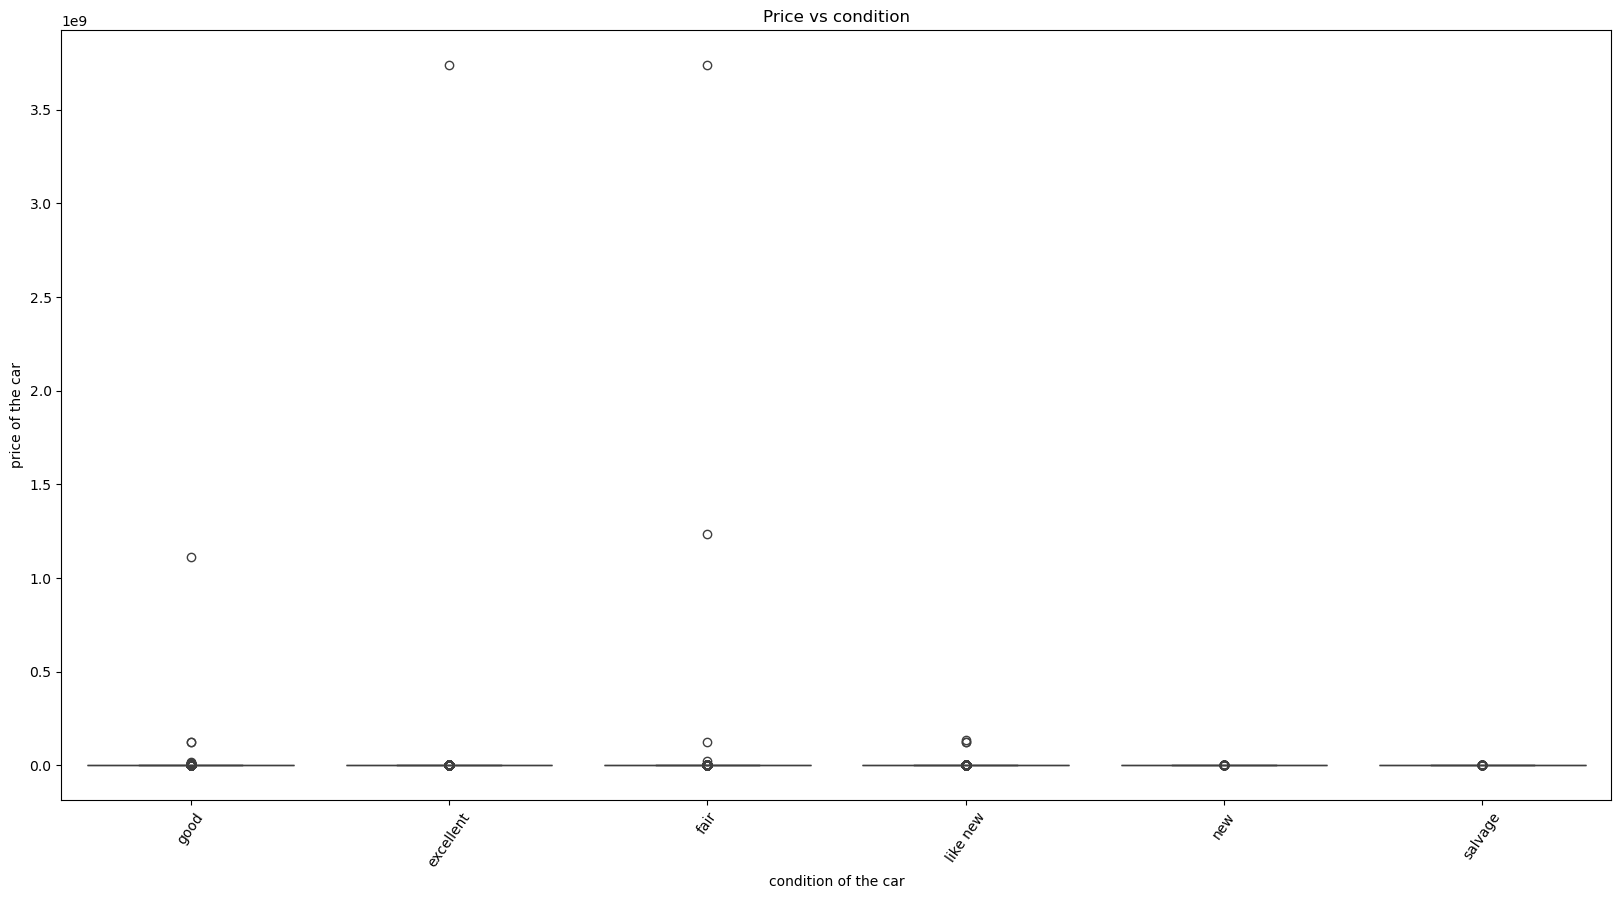

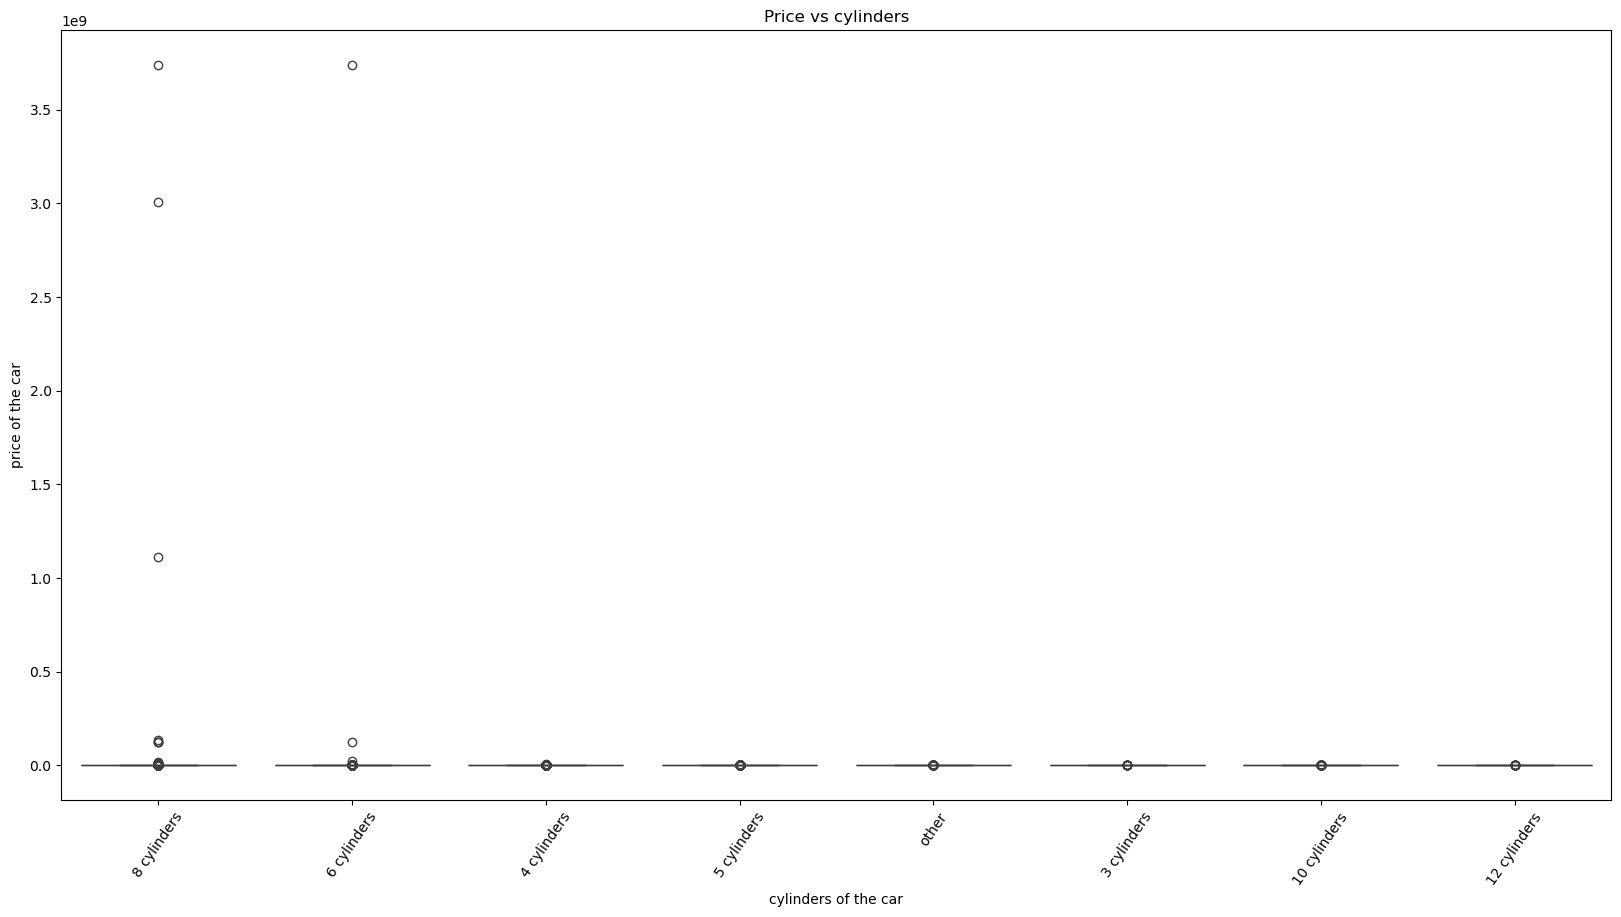

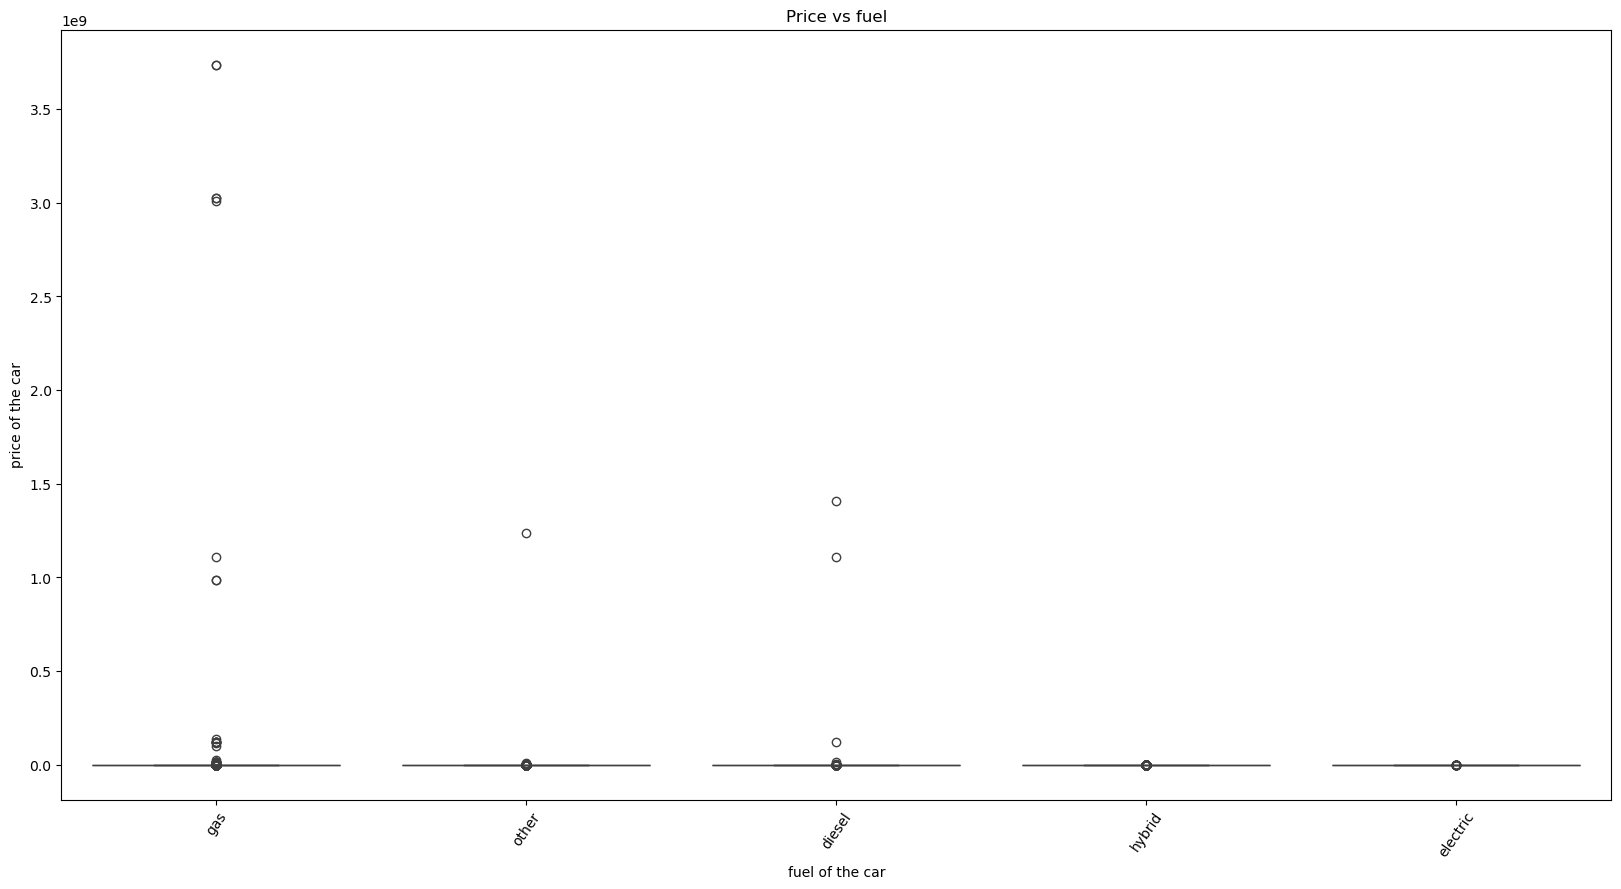

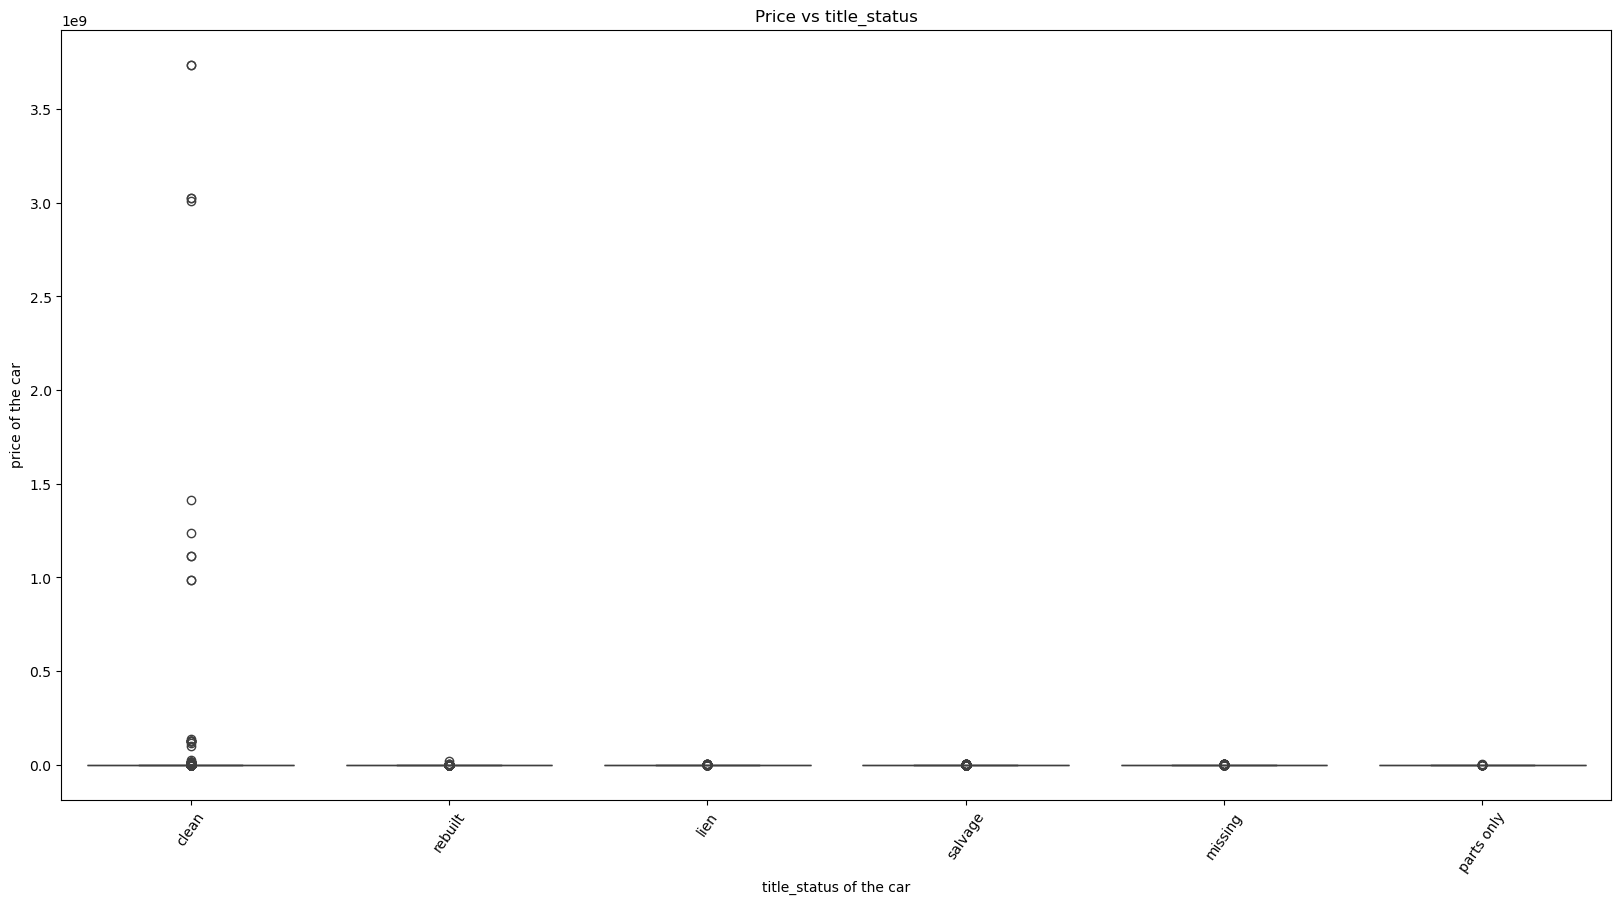

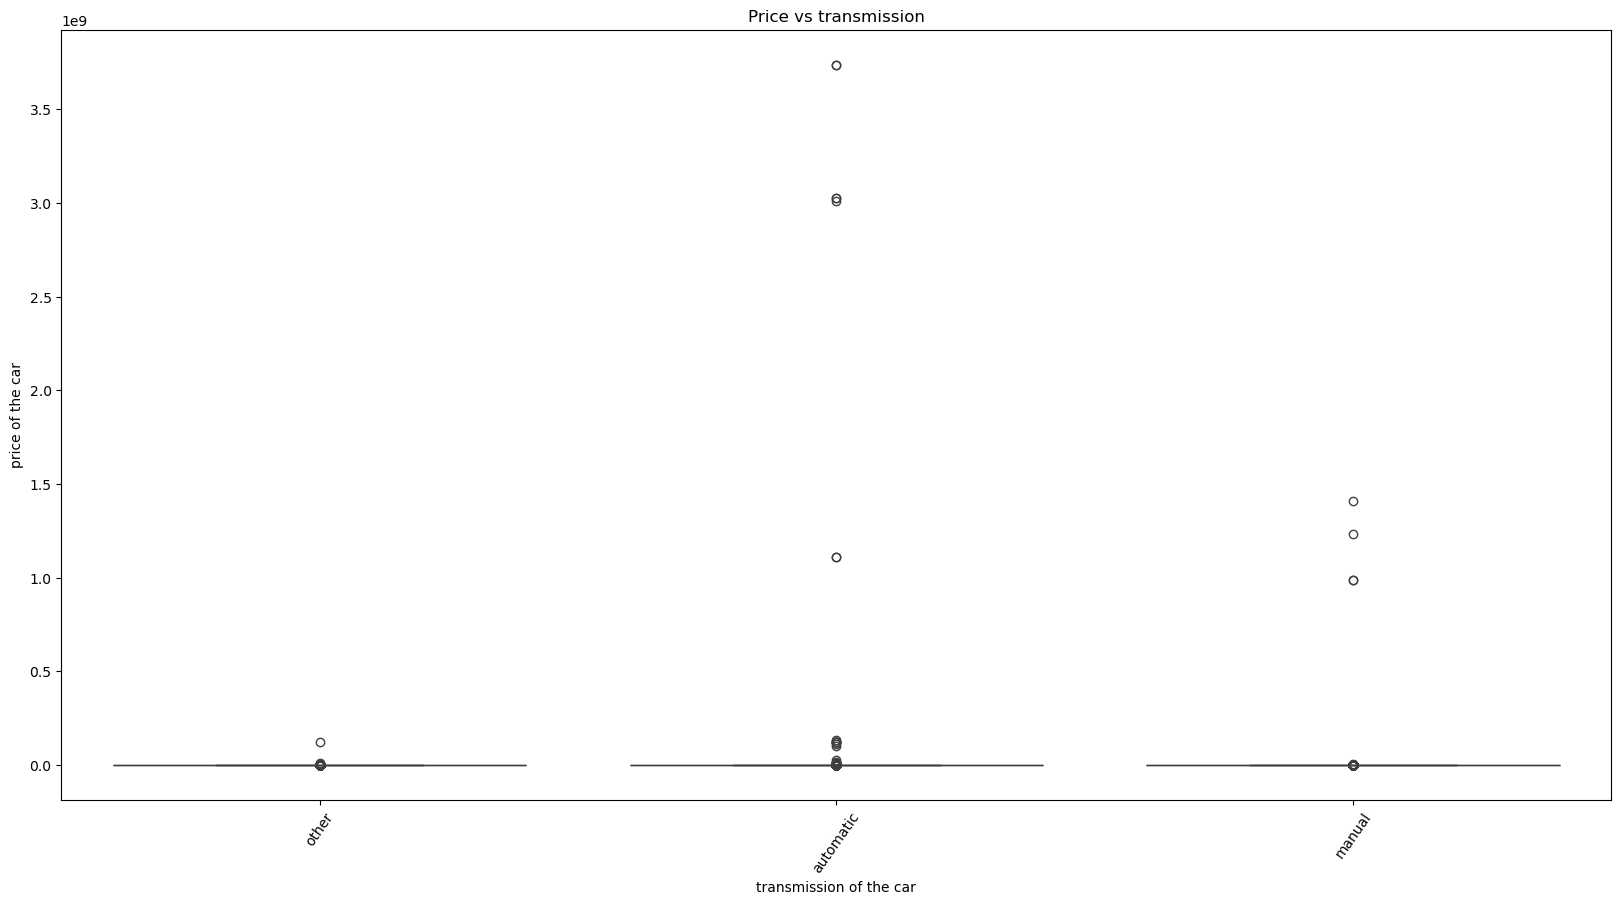

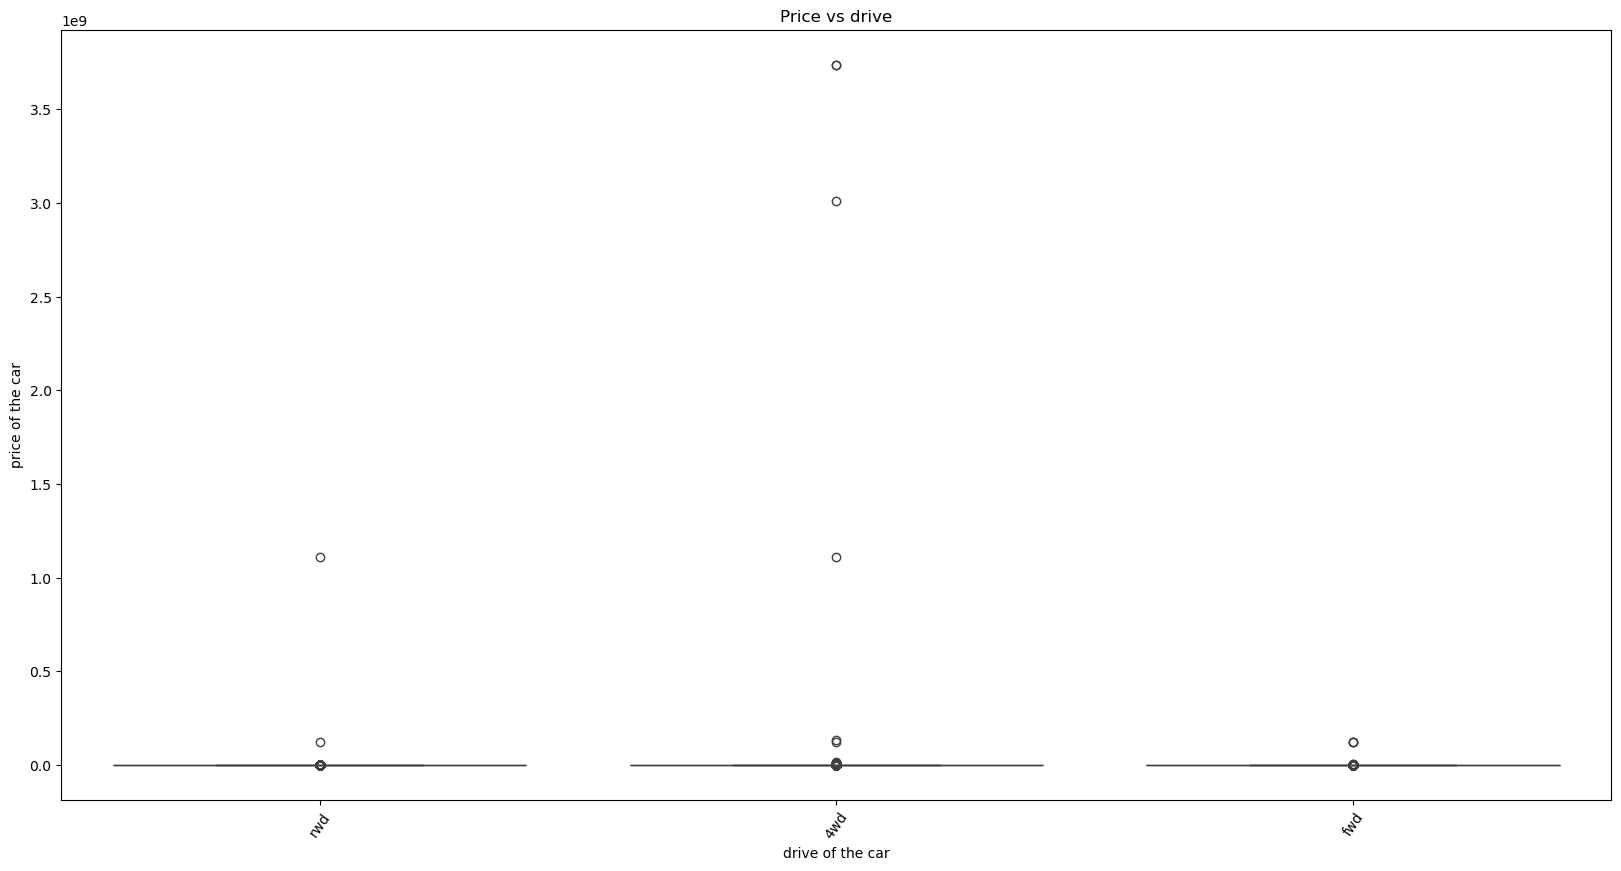

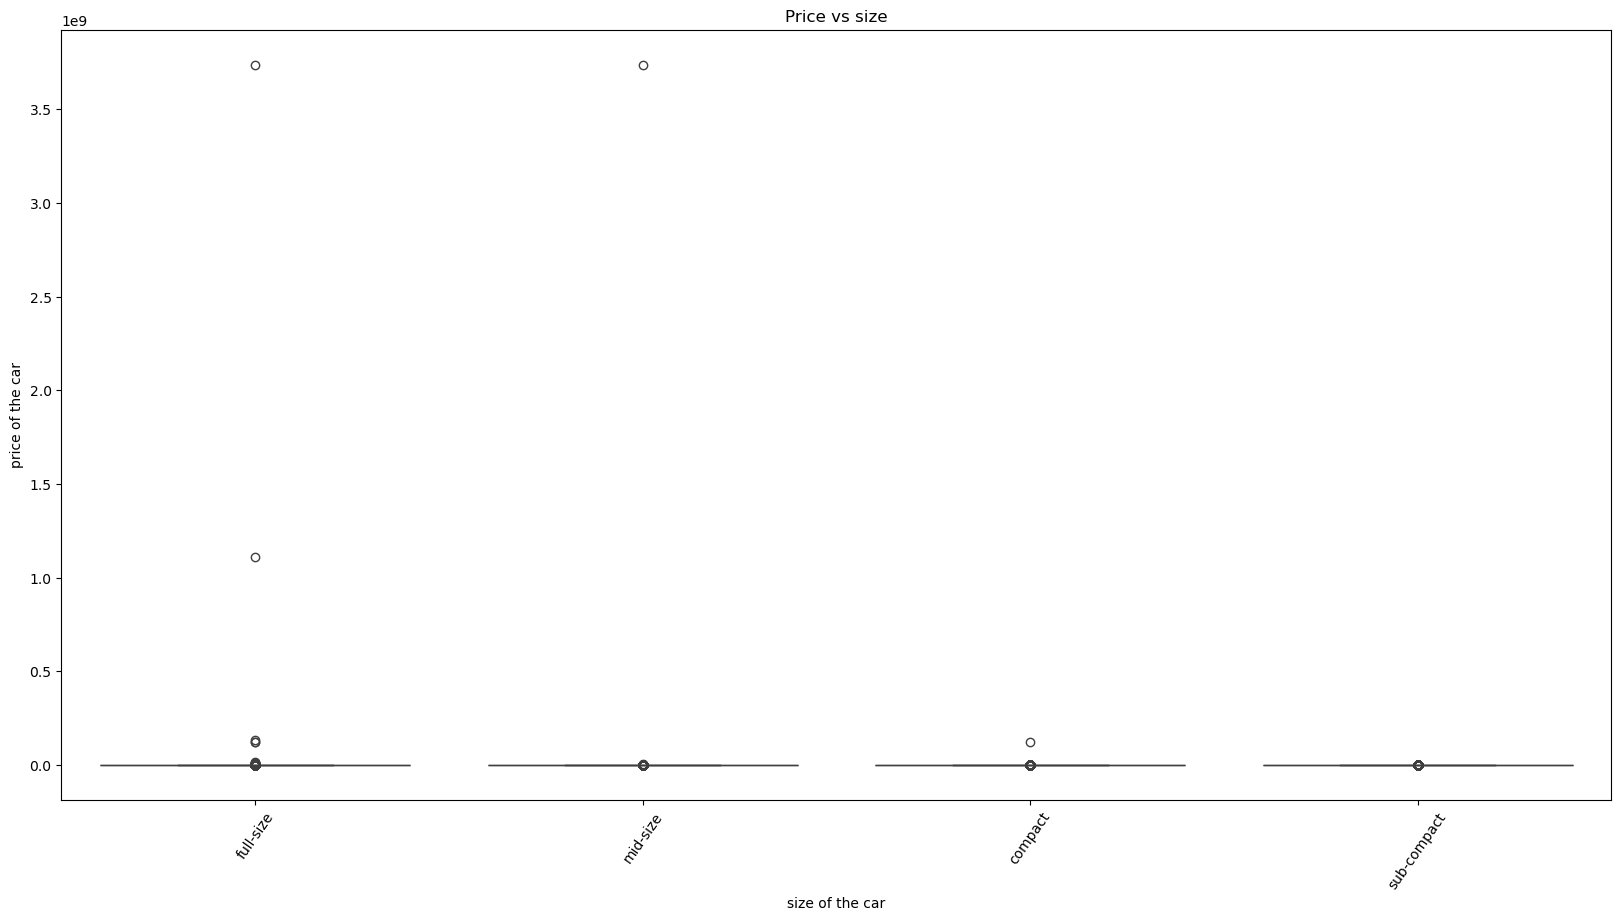

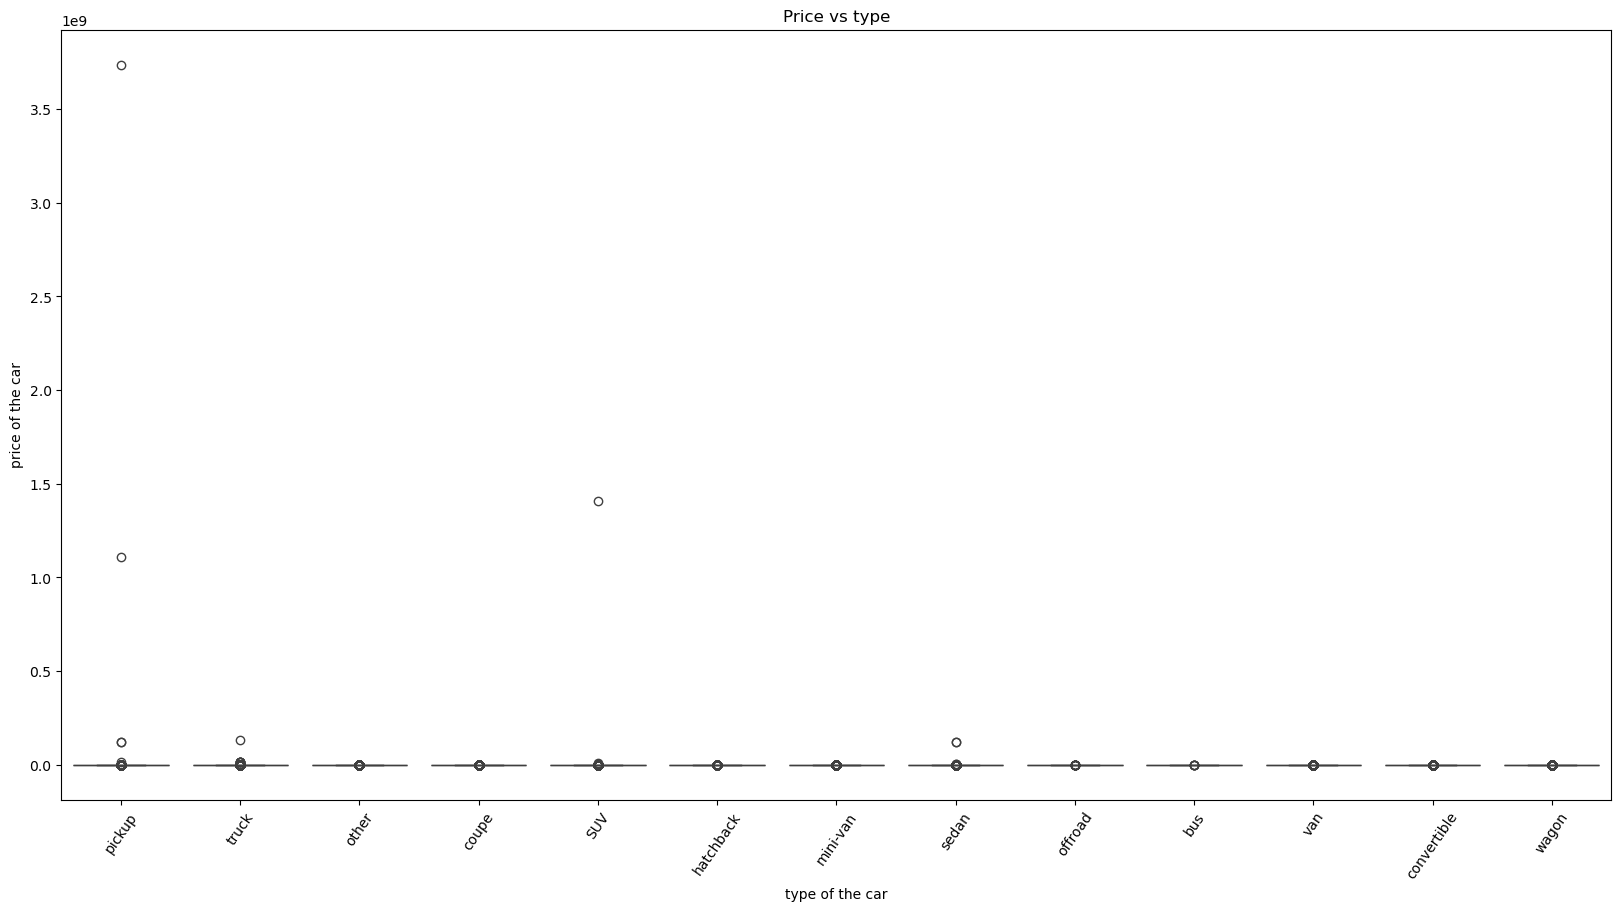

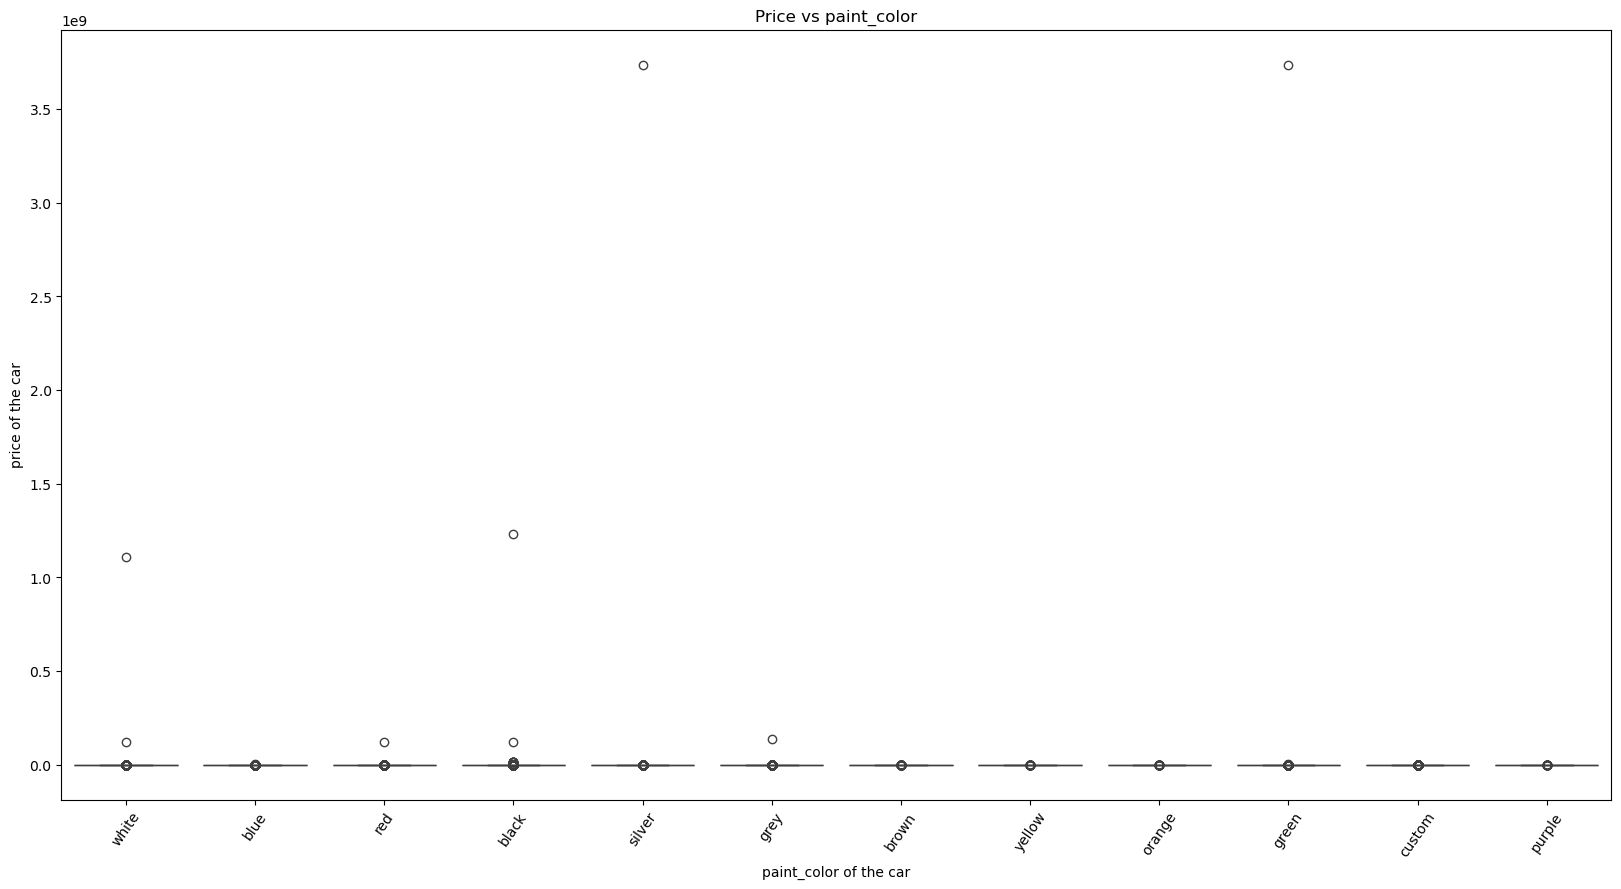

In [15]:
data_object_columns = data.select_dtypes(include='object').columns.tolist()
data_object_columns.remove('VIN')
data_object_columns.remove('state')
data_object_columns.remove('model')
data_object_columns.remove('region')
for column in data_object_columns:
    plt.figure(figsize=(20,10))
    sns.boxplot(data=data, x=data[column], y=data['price'])
    plt.title("Price vs " + column)
    plt.xlabel(column + " of the car")
    plt.xticks(rotation=55)
    plt.ylabel("price of the car")
    plt.show()

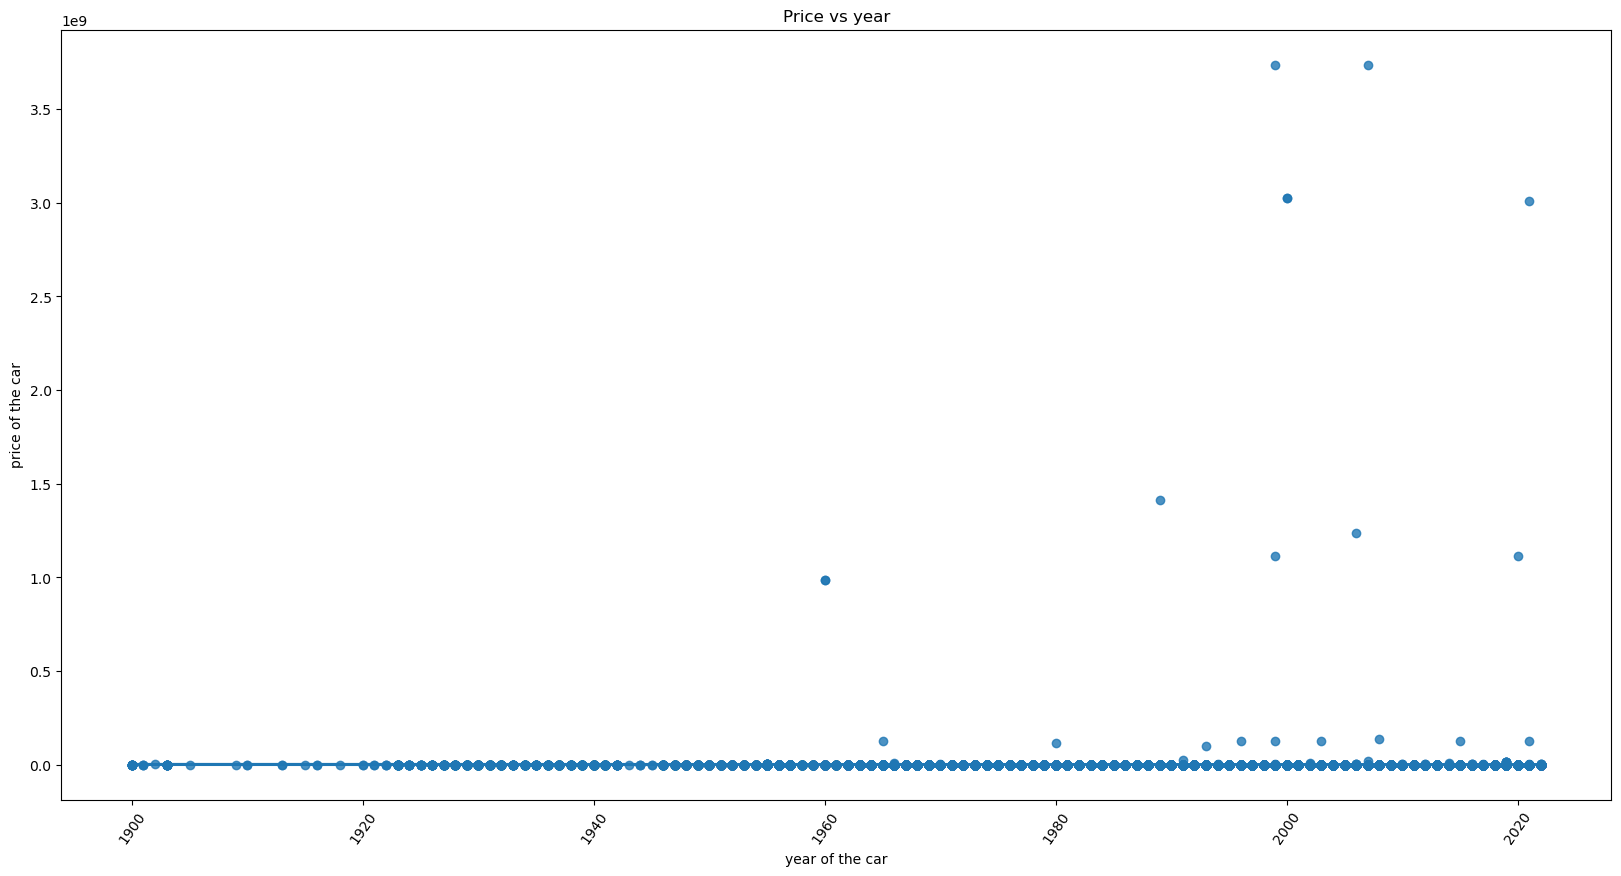

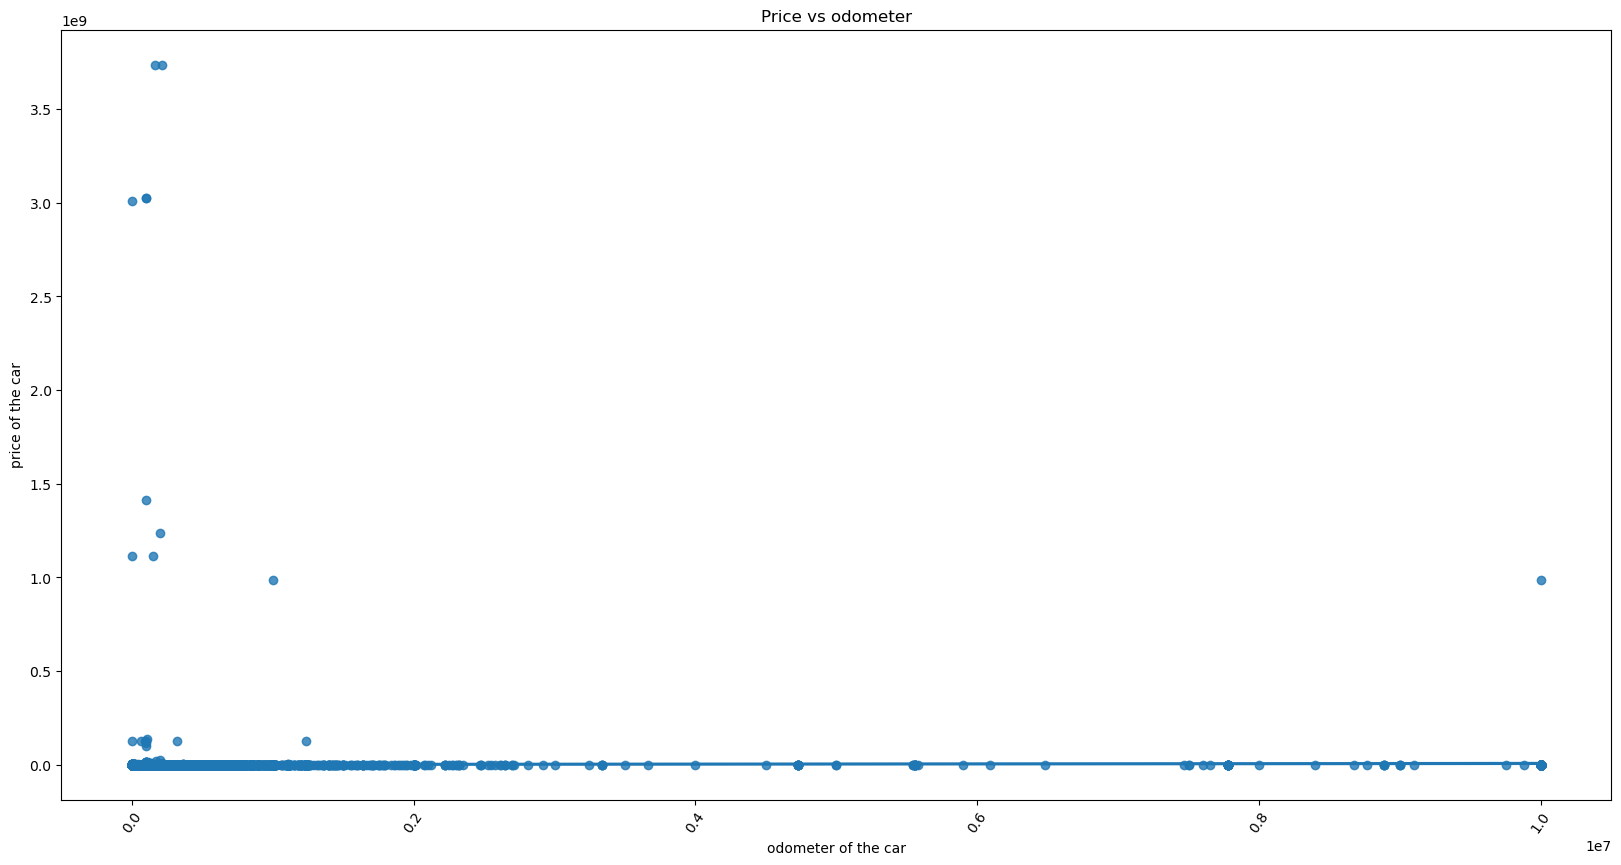

In [16]:
data_numeric_columns = data.select_dtypes(include=['float64']).columns
for column in data_numeric_columns:
    plt.figure(figsize=(20,10))
    sns.regplot(data=data, y=data['price'], x=data[column])
    plt.title("Price vs " + column)
    plt.xlabel(column + " of the car")
    plt.xticks(rotation=55)
    plt.ylabel("price of the car")
    plt.show()

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [18]:
# In this cell we use the different model of cars to fill the data for the rows with the same model that are missing some data, it allows us
# to compute a lot of data and have a lot more data and details for our training
models_values = np.array(data['model'].value_counts().index)
columns_to_fill = ['cylinders', 'fuel', 'drive', 'size', 'type']
i = 1
for model in models_values:
    for column in columns_to_fill:
        curr_data = data.query('model == @model')
        clean_curr_data = curr_data[column].dropna()
        if (len(curr_data) > len(clean_curr_data) and len(clean_curr_data) > 0):
            value = clean_curr_data.value_counts().index[0]
            mask = (data['model'] == model) & (data[column].isna())
            data.loc[mask, column] = value

In [19]:
data.isnull().sum()[data.isnull().sum() > 0]

year              1205
manufacturer     17646
model             5277
condition       174104
cylinders        40633
fuel              1586
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive            25944
size             90463
type             12588
paint_color     130203
dtype: int64

In [20]:
# In this cell we get rid of the outliers that we found during the data understanding
data = data[data['price'] < 300000]
data = data[data['price'] > 1000]
data = data[data['odometer'] < 500000]

In [21]:
# In this cell, we drop the columns that will not be useful for our modeling, here are the reasons for each column:
# - id, VIN, region and state are not useful for our prediction
# - paint_color has too much data missing compare to the correlation it seems to have with the prices and it cannot be computed, removing
#   the rows with missing data would be a big loss in our dataset compare to what the paint color would bring
# - size is not interesting considering the fact that we have type that will be close to size and is missing a lot less data, we also
#   tried to compute more data in size but there are still lots of missing data
# - condition could be interesting but the lack of data is too big and it's not a data we could compute so we need to do our
#   training without it even if it could have been useful with better data
# - model because it's too many different values it would create a model too complex but it helped to compute some data and the
#   manufacturer will behave close to model but in more generic cases

data.drop(['VIN', 'paint_color', 'size', 'condition', 'model', 'id', 'region', 'state'], axis=1, inplace=True)

In [22]:
print("Number of vehicles: " + str(len(data)))
print("Number of vehicles with missing data: " + str(len(data) - len(data.dropna())))

Number of vehicles: 376072
Number of vehicles with missing data: 63245


In [23]:
# We can see a big drop in the missing data in the 5 columns where we have computed data
data.isnull().sum()[data.isnull().sum() > 0]

year             1104
manufacturer    14435
cylinders       36550
fuel             1486
title_status     6288
transmission     1514
drive           22495
type            10093
dtype: int64

In [24]:
# We drop the remaining rows with missing data because it's not removing a lot of data anymore and the missing data cannot be computed
# without arbitrary choices
data = data.dropna()
len(data)

312827

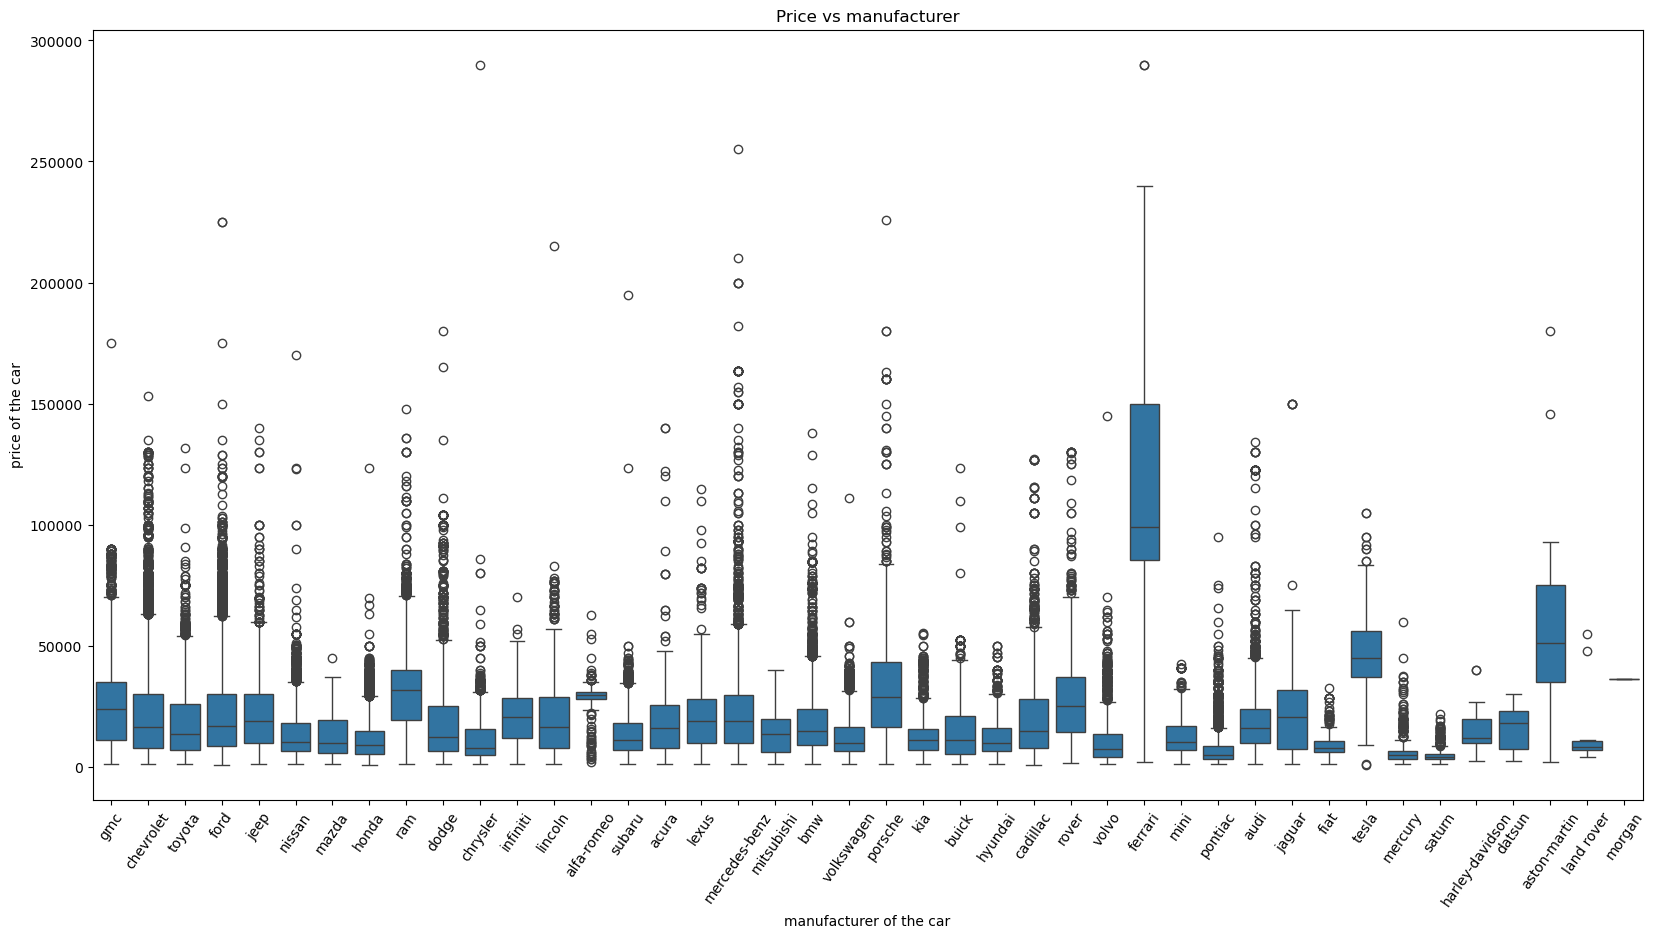

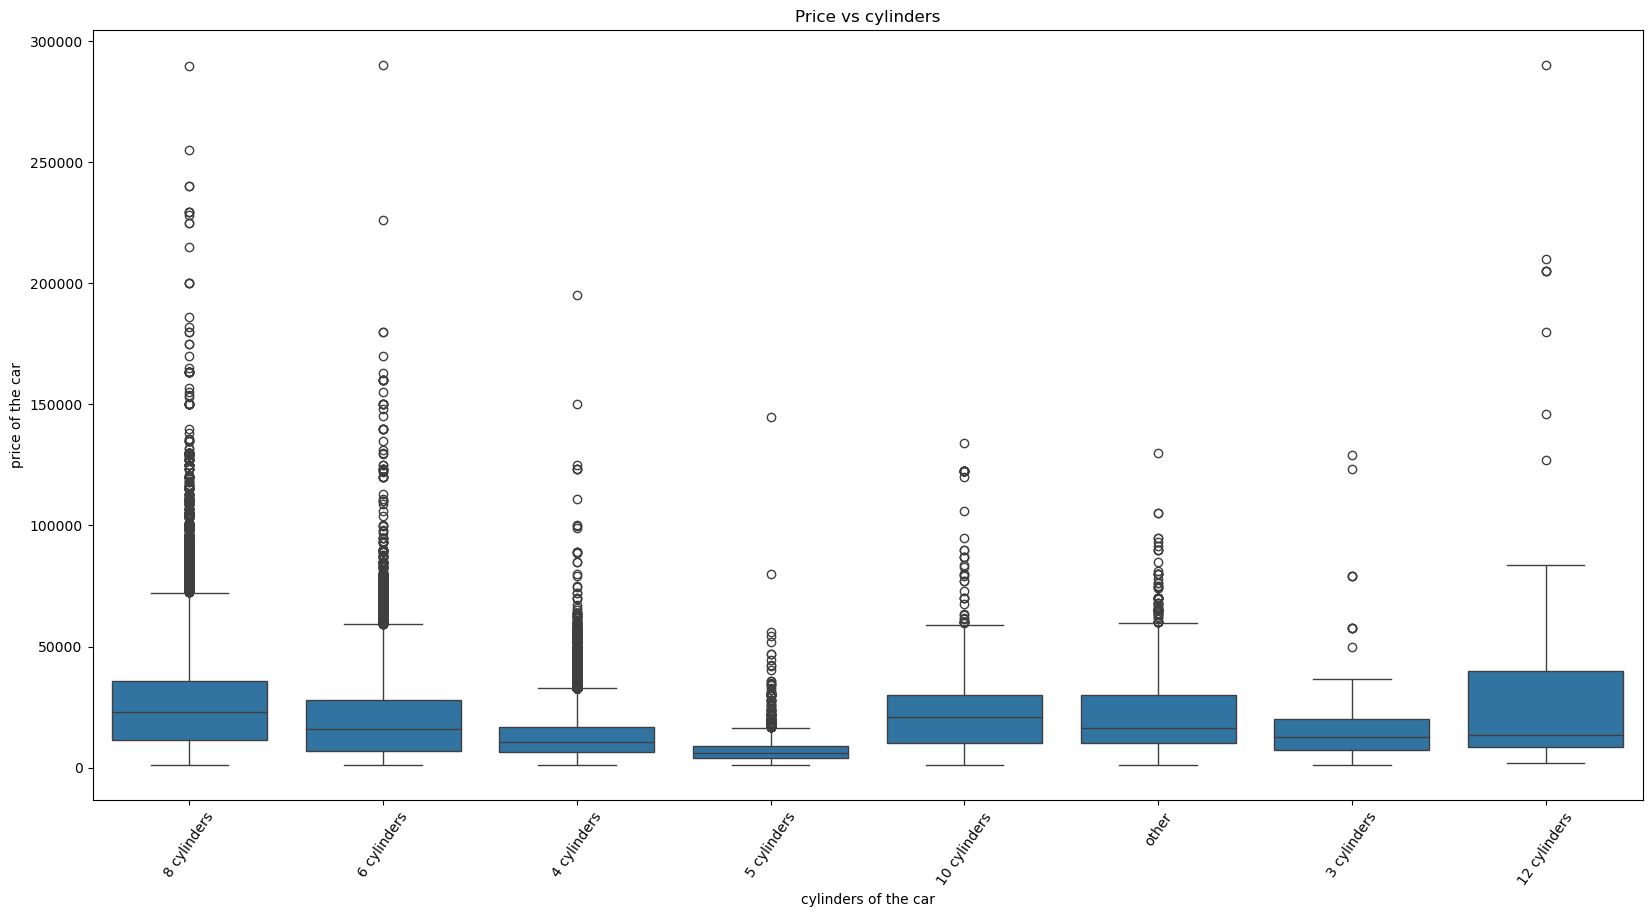

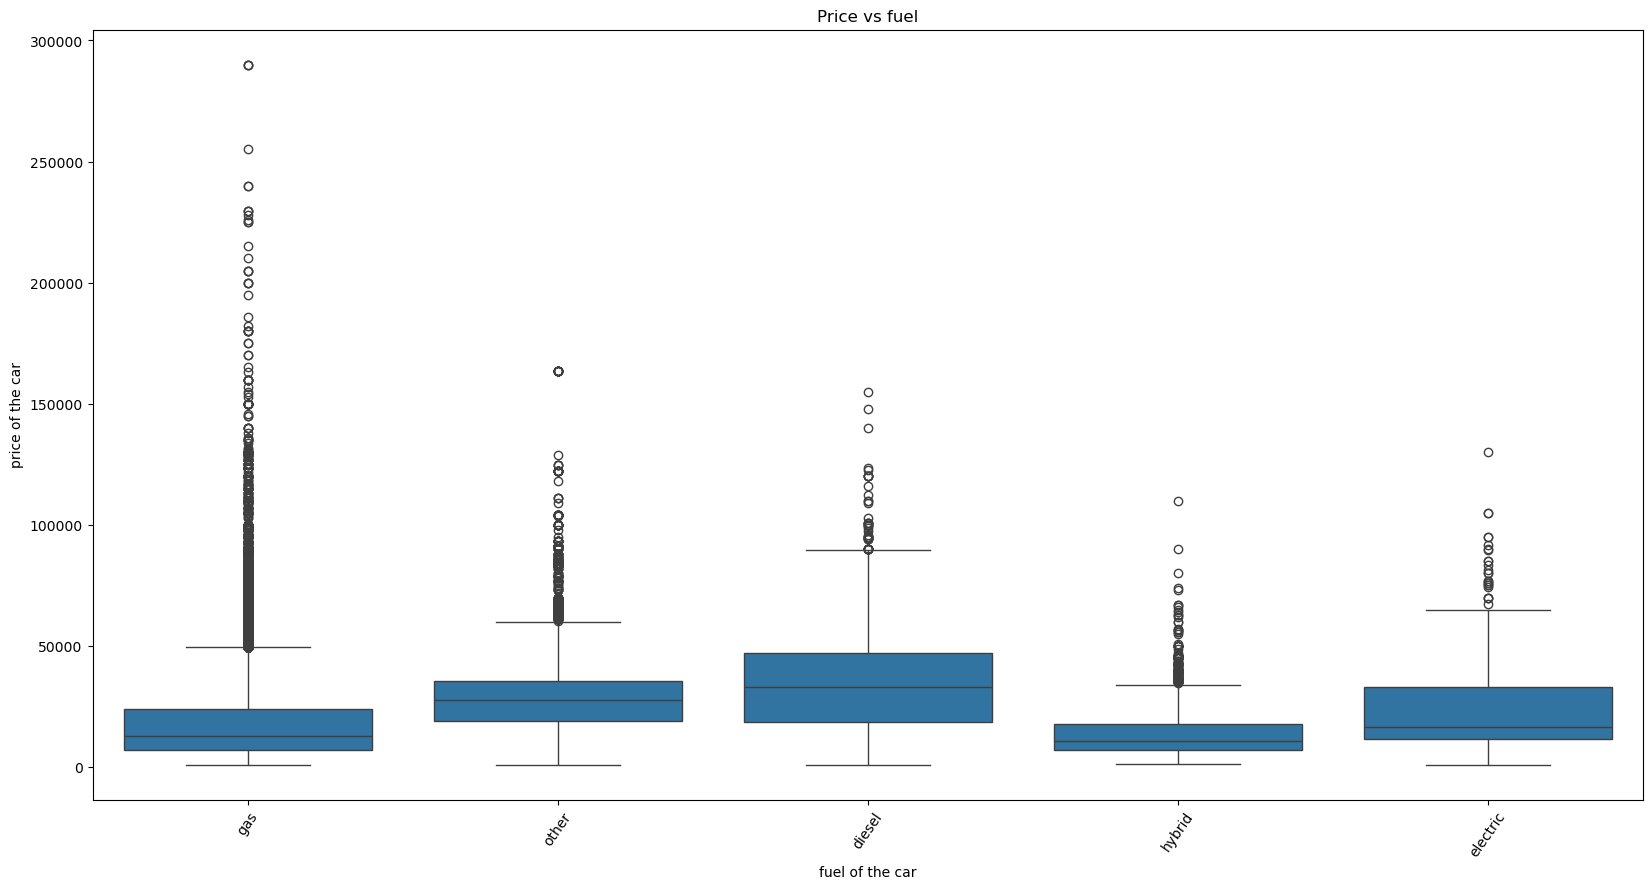

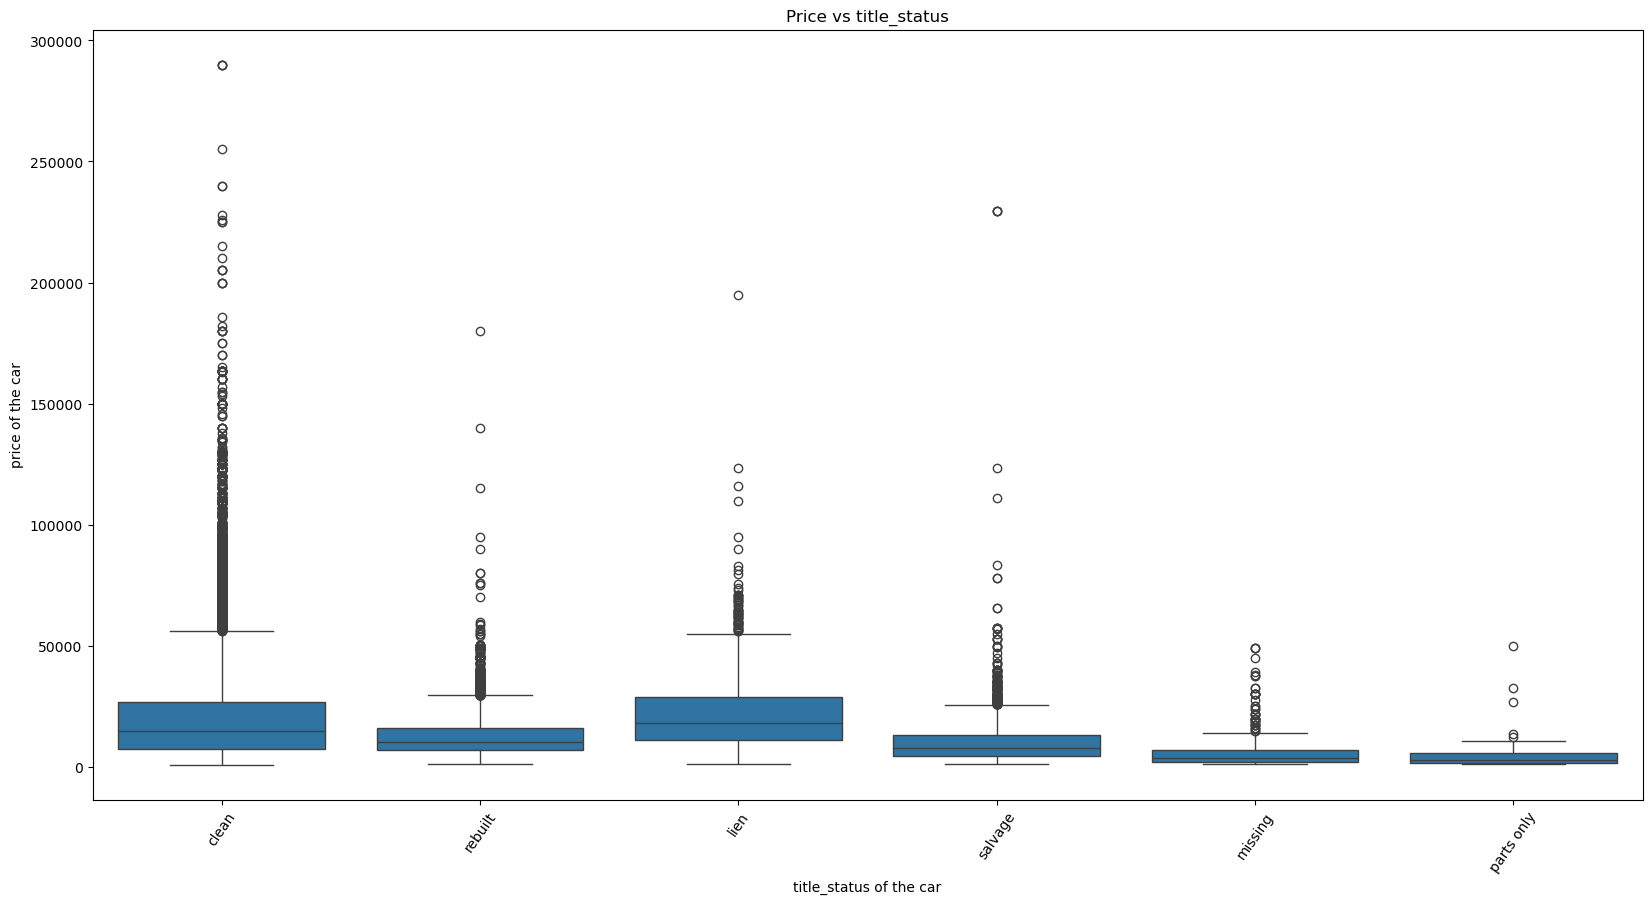

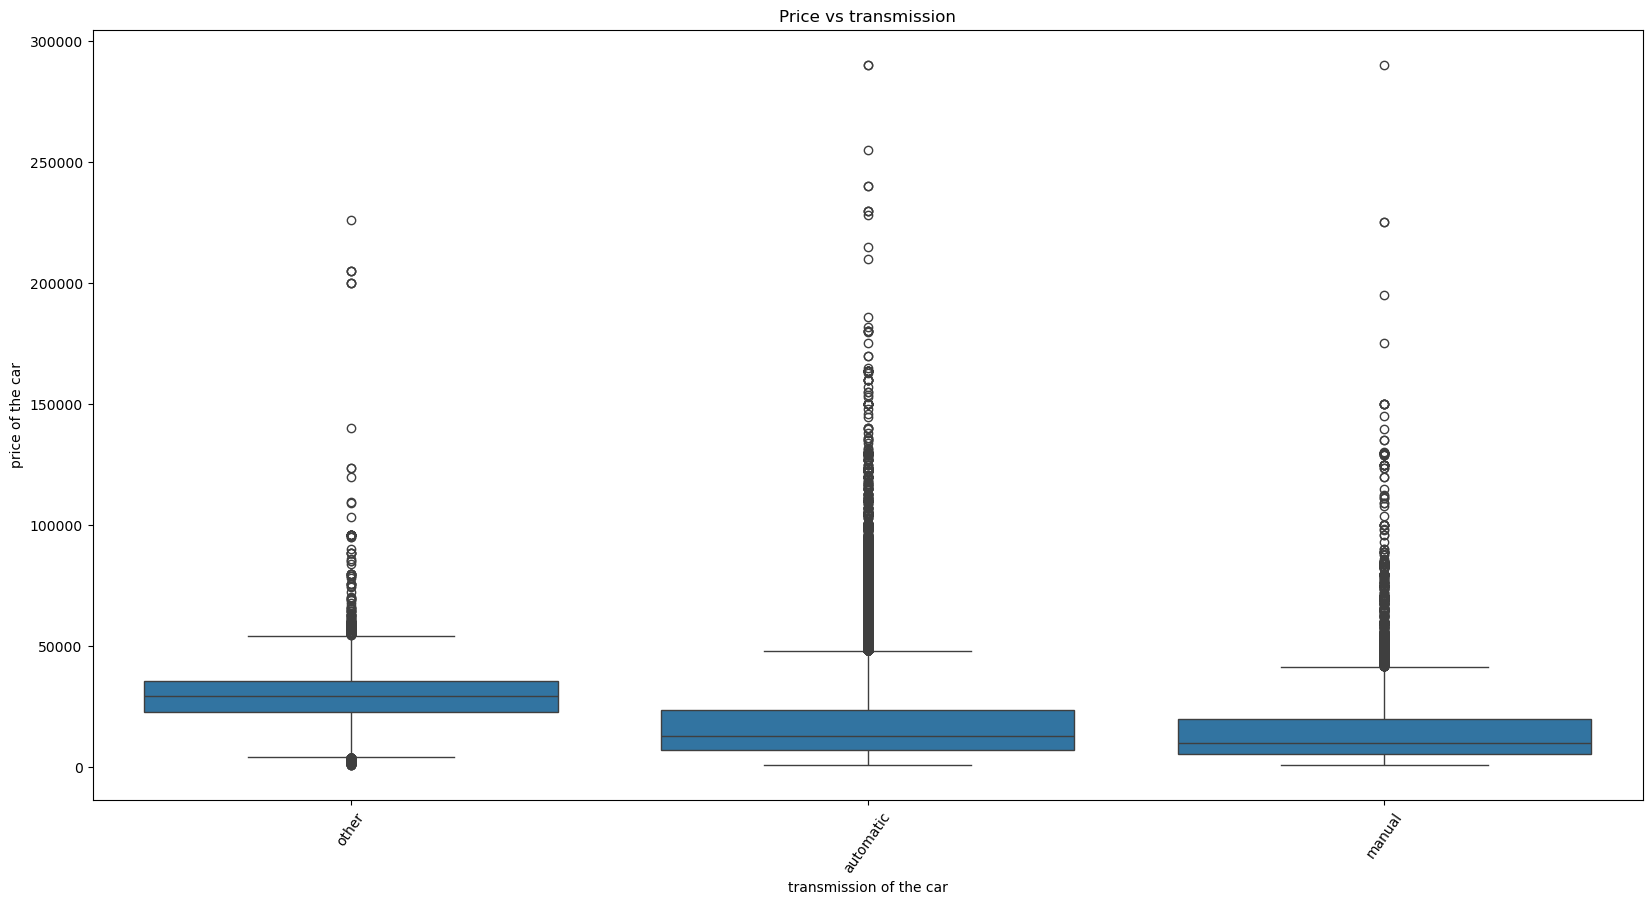

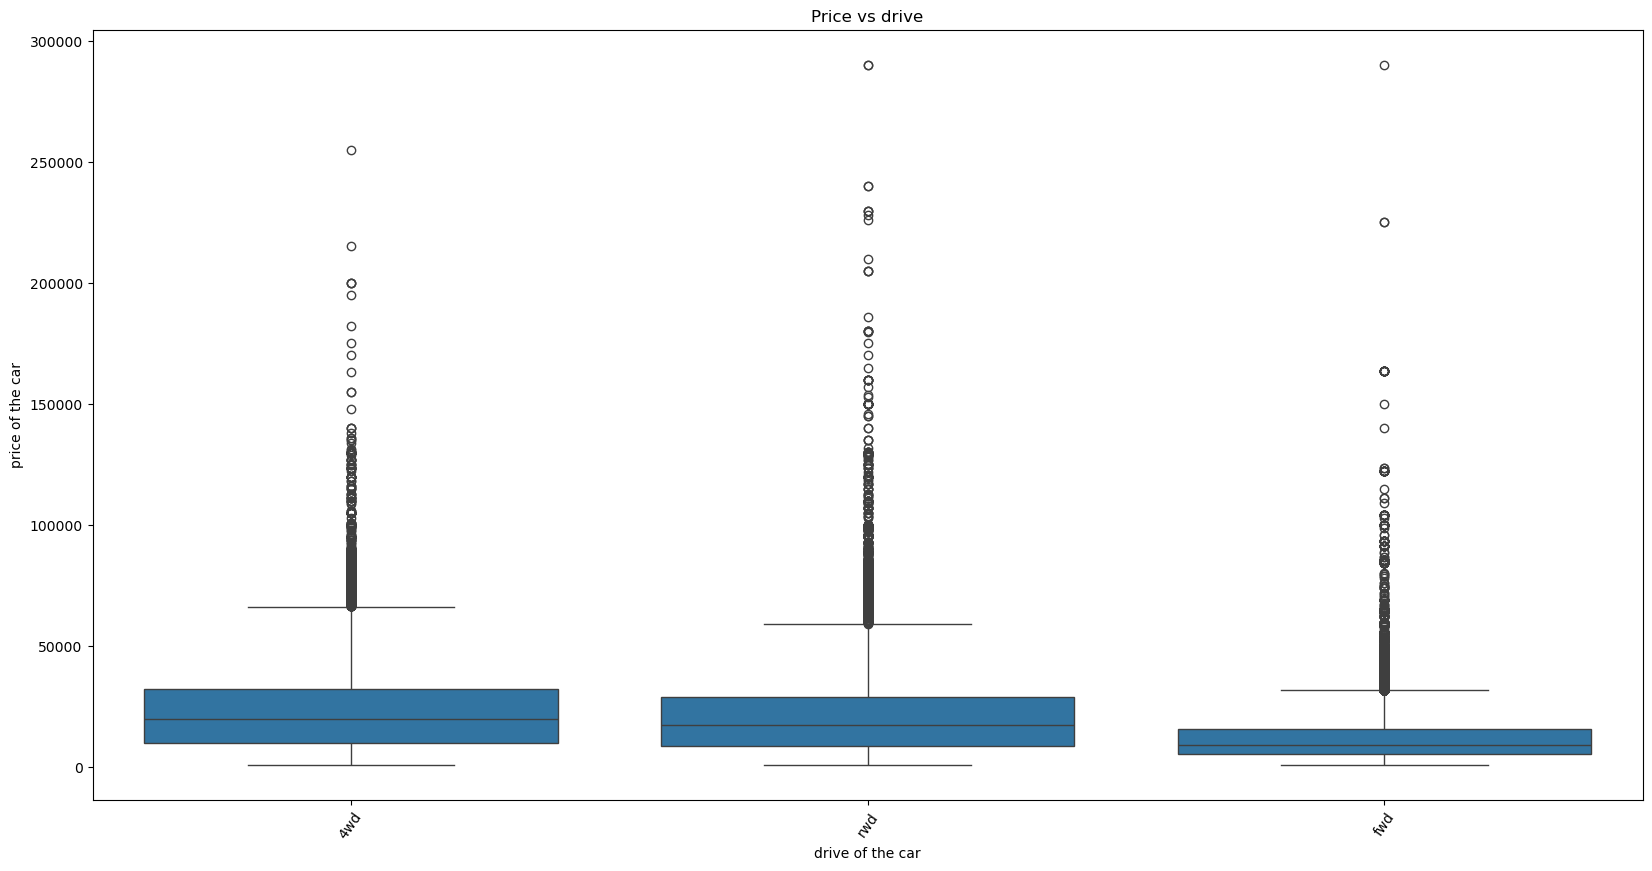

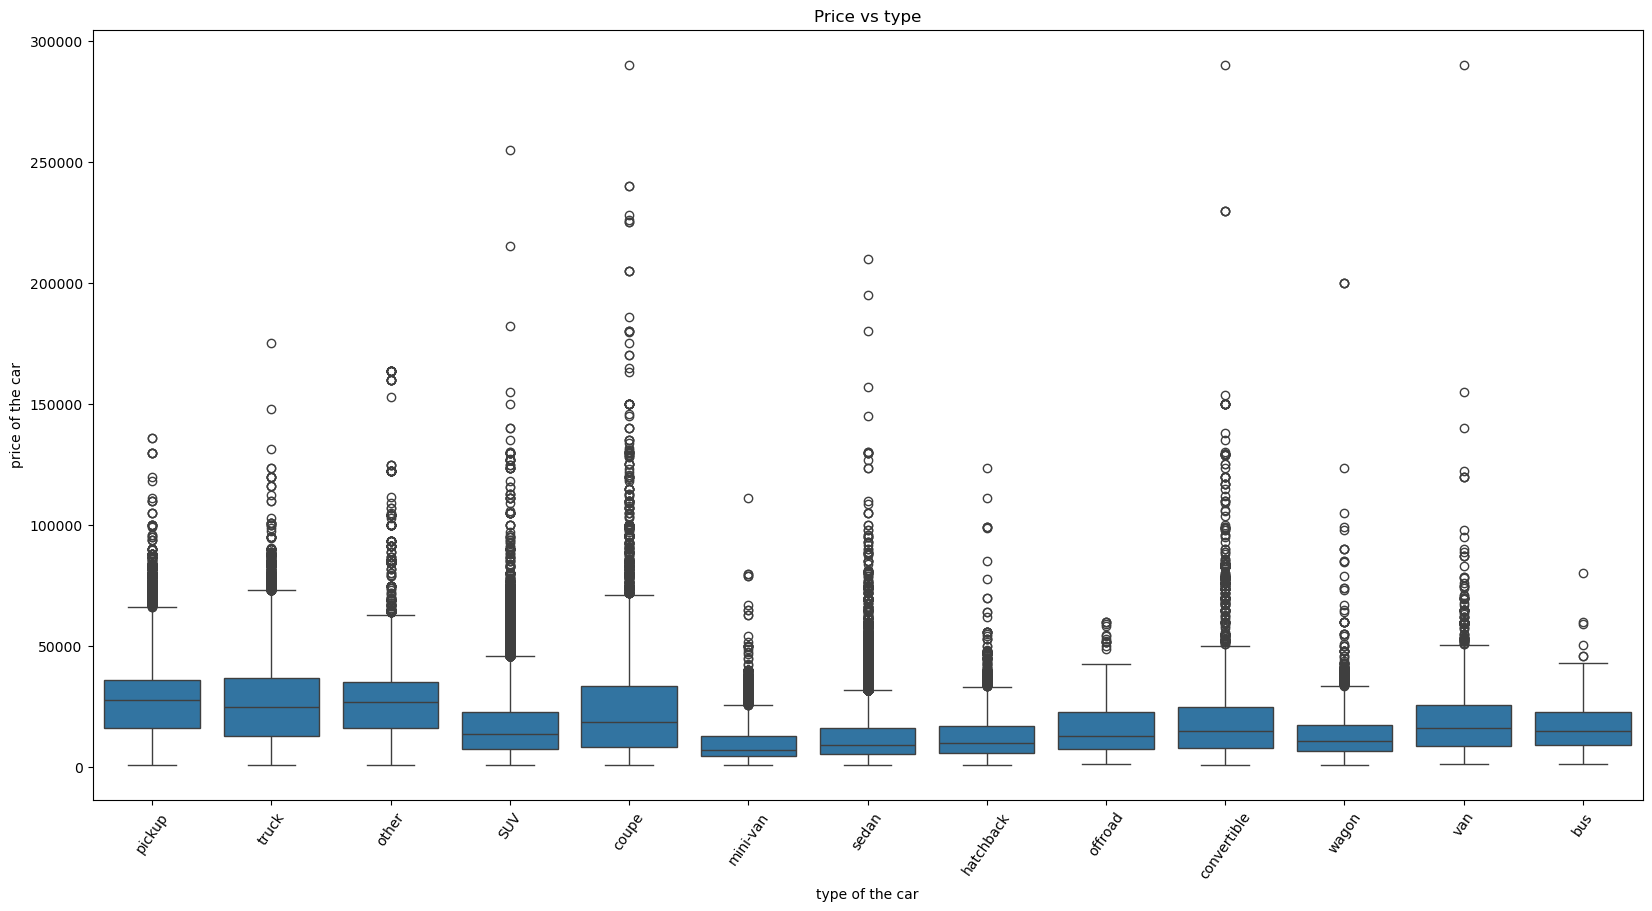

In [25]:
data_object_columns = data.select_dtypes(include='object').columns
for column in data_object_columns:
    plt.figure(figsize=(20,10))
    sns.boxplot(data=data, x=data[column], y=data['price'])
    plt.title("Price vs " + column)
    plt.xlabel(column + " of the car")
    plt.xticks(rotation=55)
    plt.ylabel("price of the car")
    plt.show()

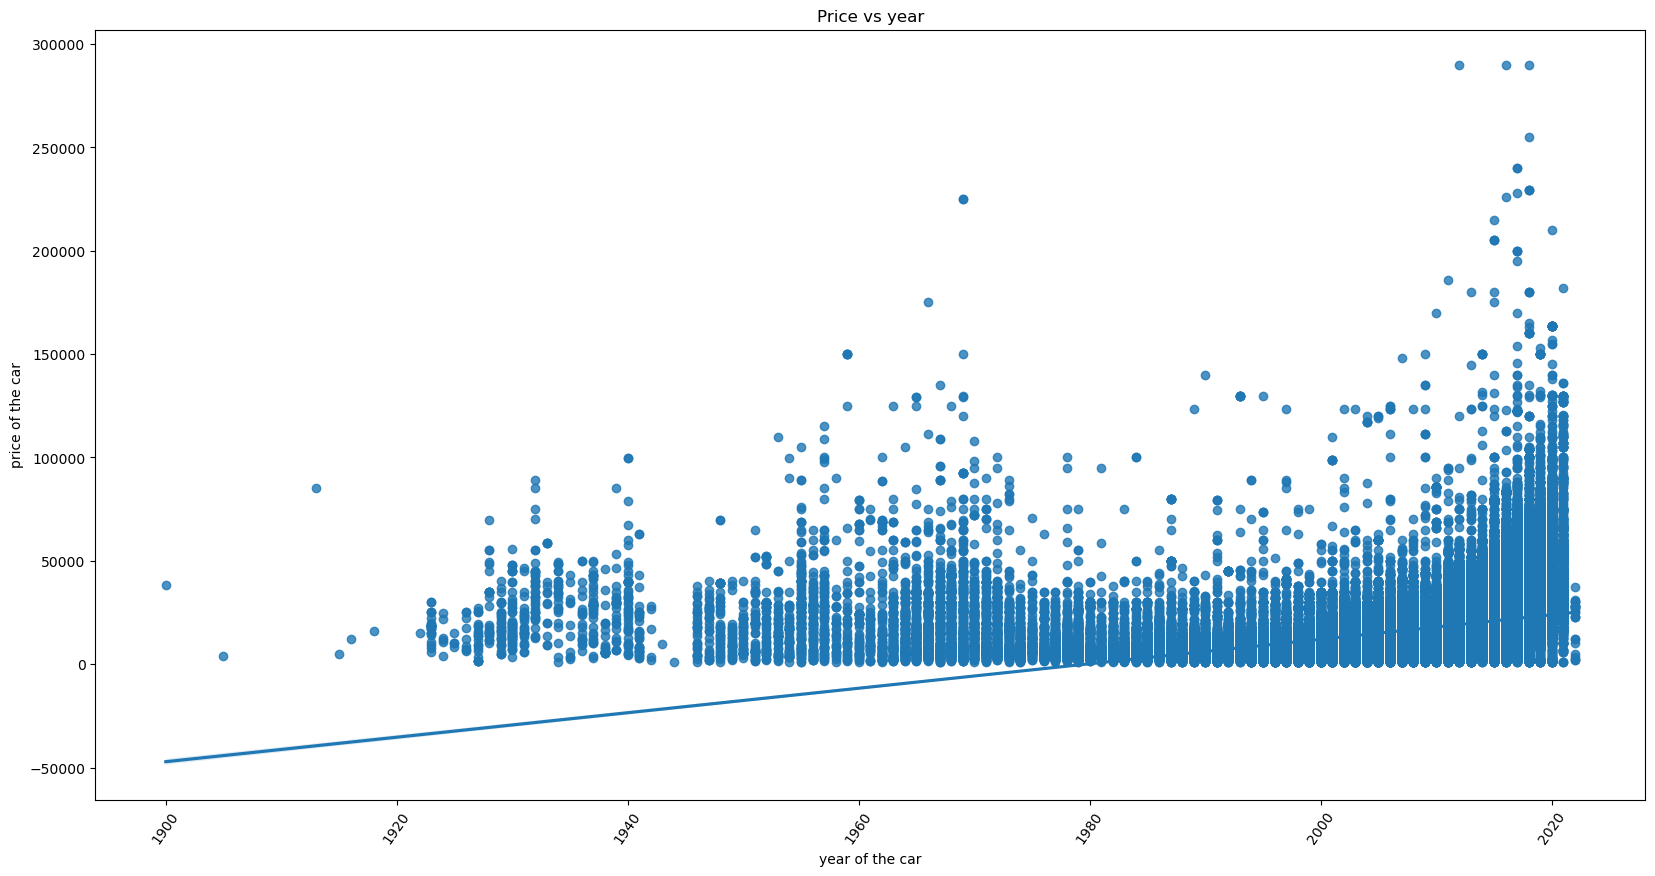

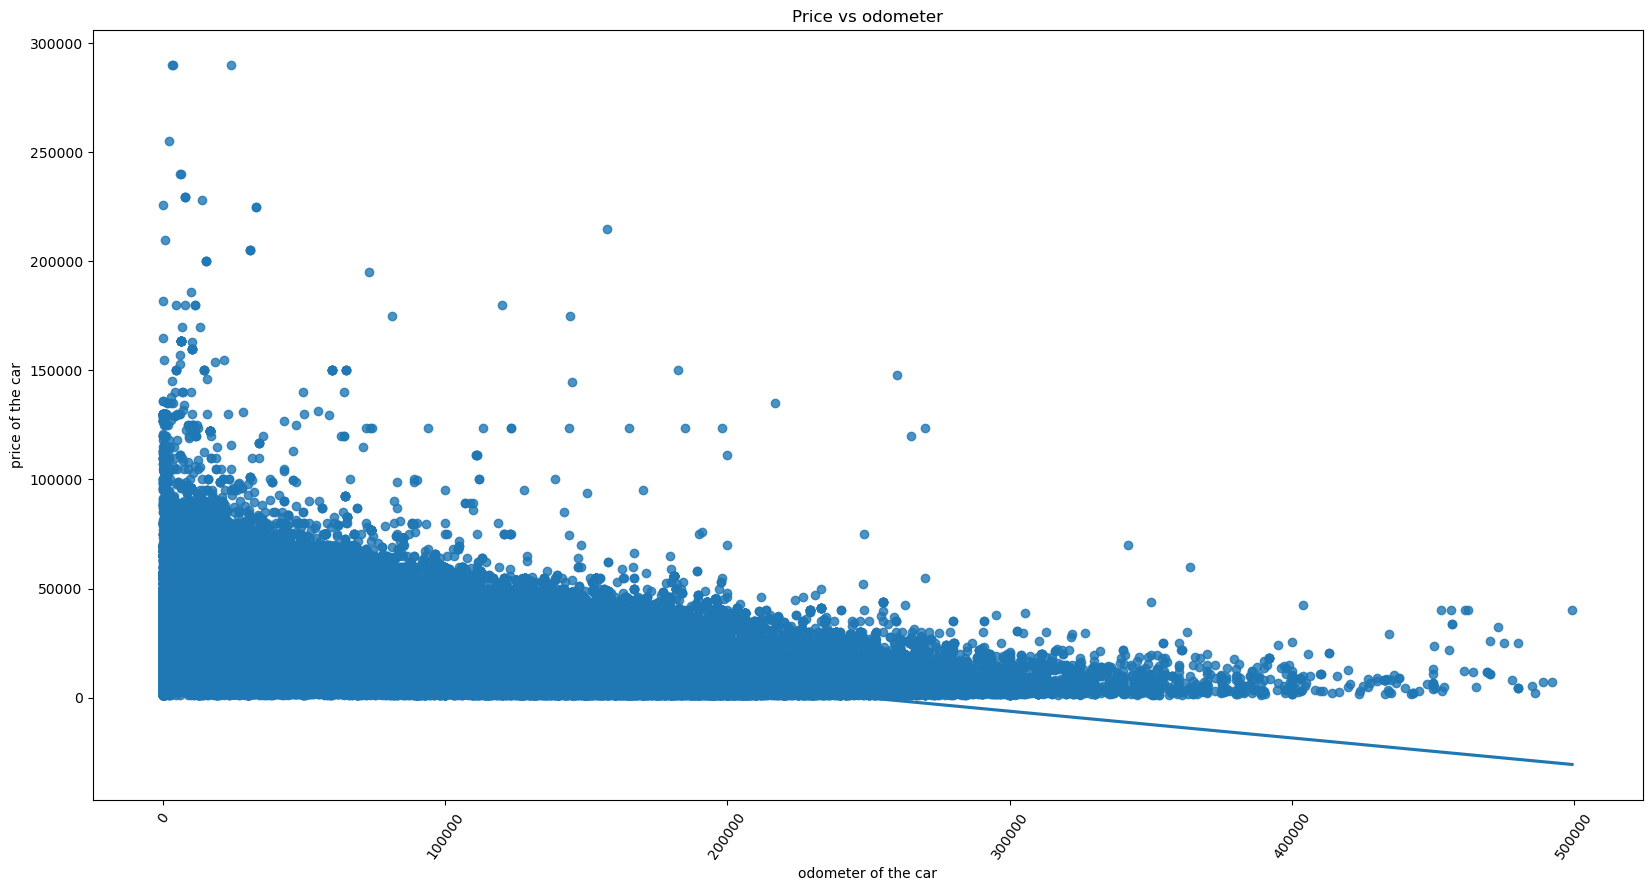

In [26]:
data_numeric_columns = data.select_dtypes(include=['float64']).columns
for column in data_numeric_columns:
    plt.figure(figsize=(20,10))
    sns.regplot(data=data, y=data['price'], x=data[column])
    plt.title("Price vs " + column)
    plt.xlabel(column + " of the car")
    plt.xticks(rotation=55)
    plt.ylabel("price of the car")
    plt.show()

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312827 entries, 27 to 426878
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         312827 non-null  int64  
 1   year          312827 non-null  float64
 2   manufacturer  312827 non-null  object 
 3   cylinders     312827 non-null  object 
 4   fuel          312827 non-null  object 
 5   odometer      312827 non-null  float64
 6   title_status  312827 non-null  object 
 7   transmission  312827 non-null  object 
 8   drive         312827 non-null  object 
 9   type          312827 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 26.3+ MB


In [28]:
# Now that our dataframe is clean, we get dummies for the columns where we cannot replace the data with numbers
data = pd.get_dummies(data, columns=['manufacturer', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type'], drop_first=True, dtype='int64')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312827 entries, 27 to 426878
Data columns (total 76 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   price                         312827 non-null  int64  
 1   year                          312827 non-null  float64
 2   odometer                      312827 non-null  float64
 3   manufacturer_alfa-romeo       312827 non-null  int64  
 4   manufacturer_aston-martin     312827 non-null  int64  
 5   manufacturer_audi             312827 non-null  int64  
 6   manufacturer_bmw              312827 non-null  int64  
 7   manufacturer_buick            312827 non-null  int64  
 8   manufacturer_cadillac         312827 non-null  int64  
 9   manufacturer_chevrolet        312827 non-null  int64  
 10  manufacturer_chrysler         312827 non-null  int64  
 11  manufacturer_datsun           312827 non-null  int64  
 12  manufacturer_dodge            312827 non-null  i

In [30]:
# We build the dataset for the predictions and the dataset with the expected values
X = data.drop(['price'], axis=1)
y = data['price']

In [31]:
# We split both datasets into 70%/30% to use the 70% for training and the 30% for the validation
X_train, X_test = train_test_split(X, random_state=42, test_size=0.3)
y_train, y_test = train_test_split(y, random_state=42, test_size=0.3)

In [32]:
# Standardize the data to improve algorithm success avoiding importance of the features depending on the values
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.fit_transform(X_test)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [34]:
# Method defined to give an output of the different error validations for the different types of regression
def error_metrics(y_train_true, y_train_pred, y_test_true, y_test_pred):
    errors = {}
    #Errors for train data
    errors["Train_MAE"] = mean_absolute_error(y_train_true, y_train_pred)
    errors["Train_MSE"] = mean_squared_error(y_train_true, y_train_pred)
    errors["Train_RMSE"] = np.sqrt(errors["Train_MSE"])
    errors["Train_R2_Score"] = r2_score(y_train_true, y_train_pred)
    #Errors for test data
    errors["Test_MAE"] = mean_absolute_error(y_test_true, y_test_pred)
    errors["Test_MSE"] = mean_squared_error(y_test_true, y_test_pred)
    errors["Test_RMSE"] = np.sqrt(errors["Test_MSE"])
    errors["Test_R2_Score"] = r2_score(y_test_true, y_test_pred)
    return errors

In [35]:
# In this cell we use a linear regression to try to predict the car prices using the different features of the dataframe
linearRegression = LinearRegression()
linearRegression.fit(X_train_scaled, y_train)
y_train_pred = linearRegression.predict(X_train_scaled)
y_test_pred = linearRegression.predict(X_test_scaled)
error_linear_regression = error_metrics(y_train, y_train_pred, y_test, y_test_pred)
error_linear_regression

{'Train_MAE': 5573.7262751487815,
 'Train_MSE': 75498404.97124498,
 'Train_RMSE': 8688.981814415598,
 'Train_R2_Score': 0.6393899734009438,
 'Test_MAE': 5591.419241013647,
 'Test_MSE': 74673727.85308188,
 'Test_RMSE': 8641.396174987112,
 'Test_R2_Score': 0.6375626526363715}

In [36]:
linearRegression.coef_

array([ 3.90031948e+03, -6.95350909e+03,  1.26182341e+02,  2.72183412e+02,
       -9.49581997e+00, -2.86930144e+02, -1.95927723e+02, -1.53160828e+01,
       -5.82360383e+02, -5.08043457e+02,  1.28726423e+02, -5.04089534e+02,
        1.19540808e+03, -2.93781778e+02, -7.61449316e+02, -1.27110758e+02,
       -1.19711497e+02, -9.83380774e+00, -5.35467255e+02, -1.84624590e+02,
       -8.13735909e+01, -1.13698830e+02, -4.18761237e+02,  7.95434641e+00,
        2.35838700e+02, -9.61539279e+01, -2.48729095e+02,  1.99618098e+02,
       -3.11327473e+02, -2.41954548e+02, -4.64937983e+02,  7.23233313e+01,
       -7.97927174e+02, -1.11203346e+02,  6.48102235e+02,  8.60526498e+01,
        3.03904330e+02, -2.11359341e+02, -3.16299505e+02,  6.74814151e+02,
        3.73345423e+02, -3.42331745e+02, -4.42740321e+01,  5.22891086e+01,
       -5.60409655e+02, -5.37173008e+03, -8.16612397e+02, -3.56058336e+03,
       -1.13706955e+03, -7.04081578e+02, -7.69275590e+02, -4.65724500e+03,
       -1.32667025e+03, -

In [37]:
# In this cell we use a grid search to try to find an optimize lasso regression to try to predict the car prices using
# the different features of the dataframe
lasso_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('model', Lasso())
])
param_grid = {
    'model__alpha': [1, 10]
}
grid_search_lasso = GridSearchCV(lasso_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)
best_lasso_model = grid_search_lasso.best_estimator_
print(best_lasso_model)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.180e+12, tolerance: 3.659e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.088e+12, tolerance: 3.662e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.225e+12, toler

Pipeline(steps=[('scale', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Lasso(alpha=10))])


In [38]:
# In this cell we use the optimized lasso regression found by the grid search to build our model to predict the car prices
best_lasso_model.fit(X_train, y_train)
y_train_pred = best_lasso_model.predict(X_train)
y_test_pred = best_lasso_model.predict(X_test)
error_lasso_regression = error_metrics(y_train, y_train_pred, y_test, y_test_pred)
error_lasso_regression

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.918e+10, tolerance: 4.585e+09
  model = cd_fast.enet_coordinate_descent(


{'Train_MAE': 3853.966001137021,
 'Train_MSE': 43422688.83192809,
 'Train_RMSE': 6589.589428175938,
 'Train_R2_Score': 0.7925961882155256,
 'Test_MAE': 3878.373732895188,
 'Test_MSE': 42971092.38660523,
 'Test_RMSE': 6555.23396886833,
 'Test_R2_Score': 0.7914349640001823}

In [39]:
best_lasso_model['model'].coef_

array([ 0.00000000e+00,  9.19465004e+03, -5.07194392e+03, ...,
        2.71591469e+01, -0.00000000e+00,  5.77421117e+00])

In [40]:
# In this cell we use a grid search to try to find an optimize ridge regression to try to predict the car prices using
# the different features of the dataframe
ridge_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('model', Ridge())
])
param_grid = {
    'model__alpha': [1, 10]
}
grid_search_ridge = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)
best_ridge_model = grid_search_ridge.best_estimator_
print(best_ridge_model)

Pipeline(steps=[('scale', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Ridge(alpha=10))])


In [41]:
# In this cell we use the optimized lasso regression found by the grid search to build our model to predict the car prices
best_ridge_model.fit(X_train, y_train)
y_train_pred = best_ridge_model.predict(X_train)
y_test_pred = best_ridge_model.predict(X_test)
error_ridge_regression = error_metrics(y_train, y_train_pred, y_test, y_test_pred)
error_ridge_regression

{'Train_MAE': 3838.996108663528,
 'Train_MSE': 42793129.29460333,
 'Train_RMSE': 6541.6457634607,
 'Train_R2_Score': 0.795603211762405,
 'Test_MAE': 3881.6614680545404,
 'Test_MSE': 42996941.0097885,
 'Test_RMSE': 6557.2052743366585,
 'Test_R2_Score': 0.7913095047966726}

In [42]:
best_ridge_model['model'].coef_

array([ 0.00000000e+00,  9.25487556e+03, -5.03037727e+03, ...,
       -3.79349038e+00,  3.78481997e-02,  2.53121994e+00])

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [44]:
error_linear_regression

{'Train_MAE': 5573.7262751487815,
 'Train_MSE': 75498404.97124498,
 'Train_RMSE': 8688.981814415598,
 'Train_R2_Score': 0.6393899734009438,
 'Test_MAE': 5591.419241013647,
 'Test_MSE': 74673727.85308188,
 'Test_RMSE': 8641.396174987112,
 'Test_R2_Score': 0.6375626526363715}

The results are showing that a simple linear regression gives us some results that needs improvement.

In [46]:
error_lasso_regression

{'Train_MAE': 3853.966001137021,
 'Train_MSE': 43422688.83192809,
 'Train_RMSE': 6589.589428175938,
 'Train_R2_Score': 0.7925961882155256,
 'Test_MAE': 3878.373732895188,
 'Test_MSE': 42971092.38660523,
 'Test_RMSE': 6555.23396886833,
 'Test_R2_Score': 0.7914349640001823}

The lasso model is giving us pretty decent results, the R2 score is good and the most important: the fluctuation with the test set is very low so our model seem to work properly.

In [48]:
best_lasso_model['model'].coef_

array([ 0.00000000e+00,  9.19465004e+03, -5.07194392e+03, ...,
        2.71591469e+01, -0.00000000e+00,  5.77421117e+00])

In [49]:
column_names = data.columns.tolist()
column_names.remove('price')
polynomial_feature_names = best_lasso_model['poly'].get_feature_names_out(column_names)
for coef in range(0, len(best_lasso_model['model'].coef_)):
    print(polynomial_feature_names[coef] + " " + str(best_lasso_model['model'].coef_[coef]))

1 0.0
year 9194.650044735383
odometer -5071.943922574508
manufacturer_alfa-romeo 0.0
manufacturer_aston-martin 0.0
manufacturer_audi 0.0
manufacturer_bmw 0.0
manufacturer_buick -0.0
manufacturer_cadillac 0.0
manufacturer_chevrolet -0.0
manufacturer_chrysler -0.0
manufacturer_datsun 0.0
manufacturer_dodge -0.0
manufacturer_ferrari 0.0
manufacturer_fiat -0.0
manufacturer_ford -0.0
manufacturer_gmc -0.0
manufacturer_harley-davidson -0.0
manufacturer_honda -0.0
manufacturer_hyundai -0.0
manufacturer_infiniti -0.0
manufacturer_jaguar 0.0
manufacturer_jeep -0.0
manufacturer_kia -0.0
manufacturer_land rover 0.0
manufacturer_lexus 0.0
manufacturer_lincoln -0.0
manufacturer_mazda -0.0
manufacturer_mercedes-benz 0.0
manufacturer_mercury -0.0
manufacturer_mini -0.0
manufacturer_mitsubishi -0.0
manufacturer_morgan 0.0
manufacturer_nissan -0.0
manufacturer_pontiac -0.0
manufacturer_porsche 0.0
manufacturer_ram 0.0
manufacturer_rover 0.0
manufacturer_saturn -0.0
manufacturer_subaru -0.0
manufacturer

With the results above, we can see that the year of production has a strong impact in the prediction of the price, the more recent the car will be, the more costly it will be, on the other side we see that higher the odometer is, lower the final price will be. After analyzing the data, we can also discover that if the car is a luxury brand, a high odometer is making drastically decrease the price of the car; when brands focused on large market tend to the opposite; this tendency is also reflected with the cylinders that are usually higher in luxury brand and in that case big odometer and large number of cylinders makes drastically decrease the price compare to smaller number of cylinders with big odometers.

In [51]:
error_ridge_regression

{'Train_MAE': 3838.996108663528,
 'Train_MSE': 42793129.29460333,
 'Train_RMSE': 6541.6457634607,
 'Train_R2_Score': 0.795603211762405,
 'Test_MAE': 3881.6614680545404,
 'Test_MSE': 42996941.0097885,
 'Test_RMSE': 6557.2052743366585,
 'Test_R2_Score': 0.7913095047966726}

The ridge model is giving us similar behavior as lasso model, in both cases we have good results and no fluctuation so our model seem to behave properly.

In [53]:
best_ridge_model['model'].coef_

array([ 0.00000000e+00,  9.25487556e+03, -5.03037727e+03, ...,
       -3.79349038e+00,  3.78481997e-02,  2.53121994e+00])

In [54]:
column_names = data.columns.tolist()
column_names.remove('price')
polynomial_feature_names = best_ridge_model['poly'].get_feature_names_out(column_names)
for coef in range(0, len(best_ridge_model['model'].coef_)):
    print(polynomial_feature_names[coef] + " " + str(best_ridge_model['model'].coef_[coef]))

1 0.0
year 9254.875558446207
odometer -5030.377266863193
manufacturer_alfa-romeo 0.21357238994982924
manufacturer_aston-martin -0.007891076442006477
manufacturer_audi -0.04190766949112384
manufacturer_bmw -1.1624106100271152
manufacturer_buick -6.242859256754455
manufacturer_cadillac 1.9244416161397975
manufacturer_chevrolet -79.12970792864763
manufacturer_chrysler -10.8321603508664
manufacturer_datsun 0.008844341260714953
manufacturer_dodge -15.599237820991373
manufacturer_ferrari 0.260671612852323
manufacturer_fiat -0.36999707224807554
manufacturer_ford -119.06549084363444
manufacturer_gmc 10.67888178457076
manufacturer_harley-davidson -0.0024406891816175945
manufacturer_honda -13.805749009531432
manufacturer_hyundai -24.367832652130264
manufacturer_infiniti -2.893157321655916
manufacturer_jaguar 0.33834158238322504
manufacturer_jeep -12.929221916711642
manufacturer_kia -11.718870467545297
manufacturer_land rover 0.0038695096352661155
manufacturer_lexus 8.712885877155255
manufacturer

The ridge coefficient tends to give us very similar numbers as Lasso and it's confirming the analysis done with Lasso results.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

The first main point of our result: the year of the car is very important for its price so car dealers should privilege cars that are the most recent possibles.

A second important result it's that there are two types of cars that can be good investments:
- Luxury cars with low odometers because their prices are very high but the downside it's that the different components of luxury cars are making the price decrease drastically when the odometer is high so it needs to be a low odometer
- Non luxury cars with high odometers because the prices of the components do not decrease much with high odometer so it can be very interesting to invest in them because their prices should not be too impacted by their high odometers